# Basic info

Statistics: a branch of science that analyses data that was collected from a sample. 

**The Central Dogma of Statistics**: analysis of a small random sample enables drawing inferences about the entire population.
 
<img src="Media/Central_dogma_of_statistics.png" width="400"/>

Moments of distribution:
1. First moment: location (central tendency): evaluated by metrics
2. Second moment: variability (dispersion): evaluated by metrics
3. Third moment: skewness (inclination of the data towards smaller or larger values): evaluated visually; right-skewed - median is to the left of the mean (tail is on the right side, so the peak is to the left)
4. Fourth moment: kurtosis (tendency of a dataset to have extreme values): evaluated visually

Metrics can be:
- Univariate (univariate analysis) - look at one variable: mean, variance
- Bivariate: correlation
- Multivariate: contingency table, hexagonal binning, contour plot, violin plot

# Probability

Odds that a team will win are 3 to 1 -> probability of winning = 3/(3+1) = 3/4

# Data Types

**Numerical (quantitative)** - numeric-scale data: 
- **Continuous**:  data that can take on any number within a range: height, weight; 
- **Discrete**: only integer values are possible: tablets in a bottle, rounded age; 

**Categorical (qualitative)** - data represented as specific values in categories. 
- **Nominal**: categories with no meaningful order: sex, occupation; 
- **Ordinal**: categories with a meaningful order: scale in a questionnaire, grades; 




# Measures of center

aka estimates of location, central tendency measures. 
 

| Measure | Description | Formula |
| - | - | - |
| **Arithmetic mean** | Very susceptible to outliers. Used in unipeak normally distributed data. $\mu$ (mu) - population mean, $\overline{x}$ (x hat) - sample mean | $$mean = \frac{ \sum_{i=1}^{n}x_{i} }{n}$$ |
| **Trimmed mean** | Dropping a fixed number $(p)$ of extreme values at both ends and then calculating mean. | $$trimmedMean = \frac{ \sum_{i=p+1}^{n-p}x_{i} }{n-2p}$$ |
| **Geometric mean** | $n-th$ root of the product of n values | $$x = \sqrt[n]{a_{1}a_{2}...a_{n}}$$ | 
| **Weighted mean** | the sum of all values times their weights divided by the sum of weights. | $$ weightedMean = \frac{ \sum_{i=1}^{n}w_{i}x_{i} }{ \sum_{i=1}^{n}w_{i} }$$ |
| **Median** | Middle score (number at the center) for the sorted dataset. Used in data with outliers or skewed data, as it is considered a robust estimate of location |  |
| **Mode** | The most frequent score in a dataset. Used in categorical data or in data with clusters. |  |


robust: not sensitive to extreme values. 

Outlier: a data value that is very different from most of the data. 

Expected value: mean value based on probabilities of occurrence of each category. 
- Calculated by multiplying each category (outcome) by its probability, and then sum the resulting values. 





In [67]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({
	'Name': ['John', 'Jake', 'Lea', 'Eugene', 'Dan', 'John', 'Jake', 'Lea', 'Eugene', 'Dan'], 
	'Population': [100, 200, 300, 400, 500, 100, 200, 300, 400, 800]
})


df['Population'].mean()
df['Population'].median()
stats.trim_mean(df['Population'], 0.1) # Removes top and bottom 10%

300.0

# Measures of dispersion

Measures of spread / variability. 

| Measure | Description | Formula |
| - | - | - |
| **Range** | Max - min value in a dataset. | $$range = max - min$$ |
| **Midrange** | Range divided by two. | $$midrange = \frac{max+min}{2}$$ |
| **Quantile** | Quantiles cut points dividing the range of probability distribution into continuous interval with equal probabilities. Can be *quartiles* (4 groups), *deciles* (10 groups), *percentiles* (100 groups). |  |
| **Quartile** | Value cutting data into quarters. | <img src="Media/Quartile.png" width="300"/> |
| **IQR (interquartile range)** | The difference between the 75th and the 25th percentiles; the range btw the lower (Q1) and upper (Q3) quartiles. Excludes outliers. **Q1 (lower quartile)** - median of the left half of the dataset; **Q3 (upper quartile)** - median of the right half of the dataset. Q1-Q3 = 50% of the data. Outliers are data points that exceed the boundaries set by $Q1 - 1.5*IQR$ and $Q3 + 1.5*IQR$. Boxplot can be notched and include a 95%CI in the middle. | <img src="Media/IQR.png" width="300"/> |
| **Percentile** | Percentile P is a value such that P percent of the data lies below. E.g. score of 50 is in the 90th percentile, which means that this score is better than 90% of people. | $$rank = \frac{\# of values below x}{n} * 100$$ |
| **Mean deviation from the mean** | BAD METRIC! The average difference of each value from the mean. Not good because positive and negative values cancel each other out, therefore we lose the measure of dispersion in this dataset. | $$ x = \frac{ \sum_{i=1}^{n} (x_{i}-\overline{x}) }{n} $$ |
| **Mean absolute deviation** | The mean of the absolute (module) deviation from the mean. | $$MAD = \frac{ \sum_{i=1}^{n} \|x_{i} - \overline{x}\| }{ n }$$ |
| **Median absolute deviation from the median** | More robust. | $$MADM = median( \|x_{1}-m\|, \|x_{2}-m\|, ..., \|x_{N}-m\| )$$, where m - median |
| **Variance** | Mean of squared deviations. Measures how far a set of numbers is spread out from the mean. Units = squared units, so not super intuitive. | $$variance = s^{2} = \frac{ \sum_{i=1}^{n} (x_{i} - \overline{x})^{2} }{ n-1 }$$ <img src="Media/Variance.png" width="400"/> |
| **SD (standard deviation)** | Square root of the variance. Shows how much, on average, the values differ from the mean. Measures sum of squared differences between each value and the mean. | $$s = \sqrt{variance}$$ <img src="Media/SD.png" width="400"/> |
| **Coefficient of variation** | Used to compare multiple datasets. You can compare CV of two datasets. | $$CV = \frac{SD}{\overline{x}}$$ |
| **Covariance** | Tells us if 2 values move in the same direction. 0 - independent, >0 - move together, <0 - move opposite | $$COV = \frac{ \sum( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ (n-1) }$$ |

Variance, SD are sensitive to outliers. More robust metrics - mean absolute deviation, median absolute deviation from the median, and quantiles. 

.

> Example
> 
> dataset = [2, 2, 3, 4, 5, 6, 7]
> 
> Percentile rank of 4 = $3/7 * 100 = 43\%$
> 
> What's the index of X-th percentile? 
> 
> $index = \frac{percentile}{100} * (n+1)$, then you take that index (rounded to the closest int) of the dataset
> 
> E.g. at 25th percentile, the value is $= \frac{25}{100} * (7+1) = 2$ -> 2nd value (which is 2)
> 

In [68]:
import pandas as pd

df['Population'].std()
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)
df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    100.0
0.25    200.0
0.50    300.0
0.75    400.0
0.95    665.0
Name: Population, dtype: float64

# Distributions

**Sample** - a small subset of size $n$ from a larger dataset (**population**) of size $N$. 

Sample mean: $\overline{x}$ (x-bar) vs 

Population mean: $\mu$

**Random sampling** - a process where each datapoint in the population dataset has the same probability of being chosen; to reduce sample bias. 


Errors could be due to random chance (random, no tendency) and due to bias (when there is a tendency). 

Stratified sampling - splitting the population by group (e.g. age) and randomly obtaining samples from a certain stratum. 

**Bias** - (in statistics) a systematic error in measurement or sampling.

| Bias | Explanation | Example |
| - | - | - |
| Sample bias | The sample is meaningfully and non-randomly different from the underlying population from which it was drawn. | > 1936, *Literary Digest* poll vs George Gallup for predicting Alf Landon vs Franklin Roosevelt. |
| Selection bias | The sample is selectively chosen, which results in a misleading conclusion. | **Data snooping** - sorting through the data until some interesting pattern is found. "If you tortute the data long enough, sooner or later it will confess." **Vast Search Effect** - if different models and hypotheses are repeatedly run on a large dataset, sooner or later something will be found. **Regression to the Mean** - extreme observations, which very often are due to luck, tend to be followed by more central ones; example - "rookie of the year, sophomore slump" phenomenon in sports. |



**Data (population) distribution** - the frequency distribution of individual data points in the population (original) dataset. 

After we sample, we get **sampling distribution** - the frequency distribution of sample's statistic (e.g. mean) over many samples. 



**Confidence intervals**: a more accurate alternative to point estimates. 

CI are used to show variation in the sample distribution. As per the CLT, the more data you have the narrower the distribution and (presumably) the narrower the CI. 

$$ (x, y) = \overline{x} \pm Z_{ \alpha/2 } * \frac{ \sigma }{ \sqrt{n} } $$

90% CI: 9/10 of intervals contain mean. 

alpha: doubt = 1 - confidence. 

_**Example 1**_:

For $\alpha=0.05$, critical probability $= 1 - \alpha/2 = 0.975$. Check this critical probability in the Z-table, get Z-score of $Z = 1.96$. So, equation will be: $ (x,y) = \overline{x} \pm 1.96 * \frac{ \sigma }{ \sqrt{n} } $ 

_**Example 2**_:

Two groups of 100 people. Group 1 $\mu = 9.31$  ($S = 4.67$), group 2 $\mu = 7.40$ ($S = 4.04$). 

$\overline{x}_{1} - \overline{x}_{2} = 9.31 - 7.40 = 1.91$

$\alpha = 0.05$, two-tail, so $0.025$ from each end. Look up in the Z-table -> $Z = 1.96$. Interpretation - there is a 95% chance that the true mean of the difference of the sample lies within 1.96 SD within the x1 - x2. 

Calculate SD for the difference of sample means:

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}}^{2} = \sigma_{\overline{x}_{1}}^{2} + \sigma_{\overline{x}_{2}}^{2} = \sigma_{x_{1}}^{2}/100 + \sigma_{x_{2}}^{2}/100 $

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}} = \sqrt{ S_{1}^{2}/100 + S_{2}^{2}/100 } = 0.617$

$CI = 1.91 \pm 1.21$ - We are confident that there is a 95% chance that the true difference of the two samples lies between 0.7 and 3.12.  

_**Example 3**_:

We can calculate confidence intervals without the Z-table. 

For example, if we have a bootstrap sampling distribution, for an $x%$ CI you can trim $\frac{(100-x)}{2}$ from each end of the distribution, and the trim points define the bounds of the CI. 


In [43]:
"""Confidence Intervals"""

import numpy as np, scipy.stats as st

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import


# create 95% CI for population mean weight
# sample_size < 30 -> t-distribution
data = player_data_import['height_inches'].sample(20)
a = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
print(a)
# the same but > 30 observations -> normal distribution
data = player_data_import['height_inches'].sample(1000)
b = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
print(b)


      nflId height  weight   birthDate          collegeName Position  \
0     42901    6-1     208  1992-07-25        James Madison       SS   
1     43501    6-0     220  1994-08-11     Central Michigan       FS   
2     43534    6-0     205  1993-06-02             Illinois       SS   
3     43535    6-1     235  1992-12-22               Temple      MLB   
4     44174    6-1     236  1993-02-22           Texas Tech      ILB   
...     ...    ...     ...         ...                  ...      ...   
2727  33216    6-3     320  06/16/1986      Central Florida        G   
2728  33184    6-3     265  05/02/1985  Winston-Salem State       DE   
2729  45651    5-9     198  06/16/1993                 Iowa       WR   
2730  41284     73     230  1992-10-20                  LSU       RB   
2731  42849   5-10     205  12/14/1992           Texas Tech       WR   

            displayName  
0          Dean Marlowe  
1         Kavon Frazier  
2     Clayton Fejedelem  
3      Tyler Matakevich  
4    

C:\Users\evgen\AppData\Local\Temp\ipykernel_12052\2322113559.py:20: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  a = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
C:\Users\evgen\AppData\Local\Temp\ipykernel_12052\2322113559.py:24: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  b = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))


## Sampling distributions

**Central Limit Theorem** - <u>the sampling distribution (distributions of means from multiple samples) tends to adopt bell-shaped / normal curve with increasing the size of a sample, 
even if the underlying population distribution is non-normal </u>; additionally, with increasing sample size we get closer to the mean. 

**SE (standard error)**: represents variability in the sampling distribution, hence accuracy of the estimate. 

$$StandardError = SE = \frac{s}{\sqrt{n}}$$
, where $s$ - standard deviation of the samples, $n$ - sample size. 

With increasing sample size, SE decreases. 

**Bootstrap** - method to estimate sampling distribution. This is a way to get sample statistics from your data. First, we have a sample from a population (e.g. n=100). Then, from this sample, :
1. From the original sample, perform sampling with replacement: draw a subsample of size m (where after drawing each individual observation it is returned to the pool, so the same value / observation can be subsampled multiple times), record the mean, then return the subsample to the original sample ; here, m can be 100% of the original sample (e.g. m = n = 100), but if the sample is enormous, it can be 80% or 50%;  
2. Repeat step 1 R times; 
3. From the results from step 2, you can calculate SD / SE, find confidence interval. 

**Confidence intervals**:
- 90% CI is the interval within the central 90% of the boostrap sampling distribution; iow, an x% CI around a sample estimation should contain similar estimates x% of the time, on average; 
- Can be generated with bootstrapping. 



[[0.42547755]
 [0.18620422]
 [0.17567094]
 ...
 [0.24652183]
 [0.04711763]
 [0.38519232]]


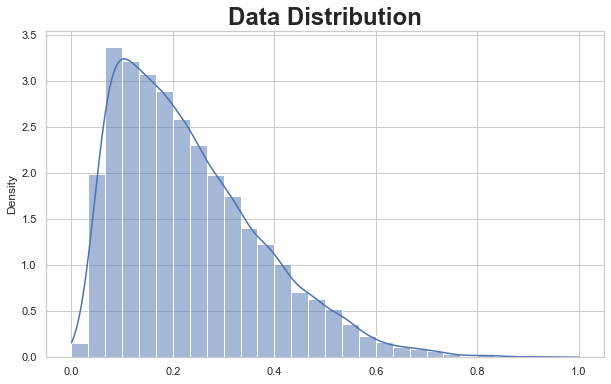

In [69]:
"""
Data (population) distribution - right-skewed
"""

import seaborn as sns
# Generate Right-Skewed data set
from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

num_data_points = 10000
max_value = 100
skewness = 15   # Positive values are right-skewed

skewed_random_data = skewnorm.rvs(a = skewness,loc=max_value, size=num_data_points, random_state=1)  
skewed_data_scaled = MinMaxScaler().fit_transform(skewed_random_data.reshape(-1, 1))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Data Distribution", fontsize=24, fontweight="bold")

sns.histplot(skewed_data_scaled, bins=30, stat="density", kde=True, legend=False, ax=ax)
print(skewed_data_scaled)

<AxesSubplot:title={'center':'Sampling Distribution'}, ylabel='Density'>

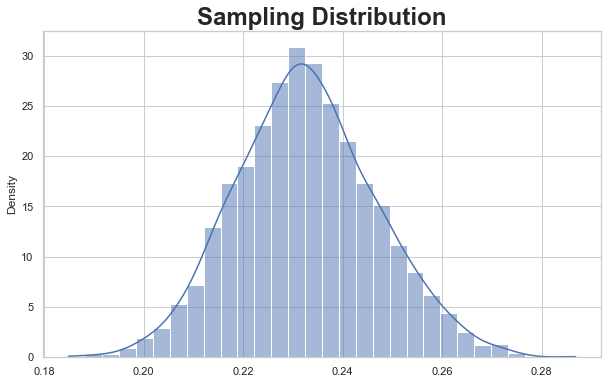

In [96]:
"""
SAMPLING DISTRIBUTION

the underlying population distribution is right-skewed, however, the sampling distribution is more normally distributed and bell-shaped. 

As per the Central Limit Theorem, the sampling distribution is bell-shaped. 
"""

import random
import statistics

# SAMPLING DISTRIBUTION

N = 100000

samples_mean = []
for i in range(2000): # 100 samples
	# pick k random items from a list
	sample = random.sample(skewed_data_scaled.tolist(), k=100)
	samples_mean.append(np.mean(sample))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Sampling Distribution", fontsize=24, fontweight="bold")
num_bins = 20
sns.histplot(samples_mean, bins=30, stat="density", kde=True, legend=False, ax=ax)



      nflId height  weight   birthDate          collegeName Position  \
0     42901    6-1     208  1992-07-25        James Madison       SS   
1     43501    6-0     220  1994-08-11     Central Michigan       FS   
2     43534    6-0     205  1993-06-02             Illinois       SS   
3     43535    6-1     235  1992-12-22               Temple      MLB   
4     44174    6-1     236  1993-02-22           Texas Tech      ILB   
...     ...    ...     ...         ...                  ...      ...   
2727  33216    6-3     320  06/16/1986      Central Florida        G   
2728  33184    6-3     265  05/02/1985  Winston-Salem State       DE   
2729  45651    5-9     198  06/16/1993                 Iowa       WR   
2730  41284     73     230  1992-10-20                  LSU       RB   
2731  42849   5-10     205  12/14/1992           Texas Tech       WR   

            displayName  
0          Dean Marlowe  
1         Kavon Frazier  
2     Clayton Fejedelem  
3      Tyler Matakevich  
4    

Text(0.5, 1.0, 'Central Limit Theorem')

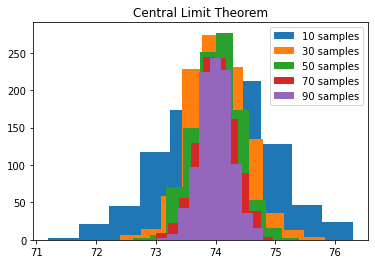

In [21]:
import pandas as pd, matplotlib.pyplot as plt
import random

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

"""Central Limit Theorem"""
# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import

# Different sample sizes - 10, 30, 50, etc.
sample_amounts = range(10, 100, 20)
#
for x in sample_amounts:
	samples = []
	# For each sample size, resample 1000 times and plot a distribution
	for i in range(1000):
		samples.append( player_data_import['height_inches'].sample(x).mean() )
		# samples.append(player_data_import['height_inches'].sample(x).mean()[0])
	plt.hist(samples)
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title('Central Limit Theorem')

In [32]:
# Bootstrapping

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
	# In this case, we resample 100% of the dataset = the same size as the original, but with possible repetitions
	sample = resample(player_data_import['height_inches'])
	if nrepeat == 1: print(sample) # Just to show one of the samples
	results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap statistics:")
print(f" - original: {player_data_import['height_inches'].mean()}")
print(f" - bias: {results.mean() - player_data_import['height_inches'].mean()}")
print(f" - std. error: {results.std()}")

1845    78
2121    77
270     69
1032    80
2141    74
        ..
801     78
1102    74
132     74
566     76
199     75
Name: height_inches, Length: 2732, dtype: int64
Bootstrap statistics:
 - original: 74.0106149341142
 - bias: -0.002151903367504815
 - std. error: 0.05018505085790604


## Normal distribution

**Normal (Gaussian) distribution**: 
- A continuous, unimodal, symmetrically-distributed bell-shaped distribution, with mean = median = mode; 
- It is completely parameterised by its mean (mu, $\mu$) and SD (sigma, $\sigma$); 
- Normal distribution implies tight bounds on the probability lying far from the mean = 68-95-99.7 empirical rule: 68% of the values must lie within 1SD of the mean, 95% within 2SD, 99.7% within 3SD. Mu and sigma can be any as long as the 68-95-99.7 rule holds; 
- **Standard normal distribution** (z-distribution): special case of normal distribution where $\mu$ = 0, $\sigma$ = 1. 




| Normal distribution |
| - |
| <img src="Media/normal-distribution.png" width="430"/> |


Six sigma - term used to connote quality standards so high that defects are incredibly rare events (e.g. plane crashes). Probability of 6σ event on the normal distribution is 2 parts per billion. 

Normality assessment: 
- Visual: 
  - QQ-Plot: plot that visualises closeness of sample distribution to a specified one. 
  - Histograms; 
- Statistical ($H_{0}$ (null): (in case of p > 0.05) the values are sampled from a population that follows a normal distribution; $H_{A}$: (in case of p <= 0.05) reject null hypothesis - assume non-normal distribution):
  - D'Agostino-Pearson
  - Kolmogorov-Smirnov
  - Anderson-Darling
  - Shapiro-Wilk

Standardisation / normalisation: 
- **Z-score** measures how many SD away from the mean a given score is:
- subtraction of the mean from a data point and division by the SD. 
- Z-score is the result of standardizing individual data values. Z table - standard normal table; what proportion is less than that amount (that SD) in a normal distribution. 
- Below, $x$ - score, $\mu$ - mean, $\sigma$ - SD. If we are figuring out Z-score of a sample, <u>use SE (standard error) instead of SD</u>

$$ Population: Z = \frac{x - \mu}{\sigma}; $$
$$ Sample: Z = \frac{x- \overline{x}}{SE} $$

array([2.06056402e-07, 3.59447087e-07, 6.19943647e-07, 1.05715301e-06,
       1.78234543e-06, 2.97107966e-06, 4.89671812e-06, 7.97929101e-06,
       1.28555865e-05, 2.04780159e-05, 3.22516730e-05, 5.02209599e-05,
       7.73189883e-05, 1.17694375e-04, 1.77130619e-04, 2.63572421e-04,
       3.87770425e-04, 5.64050241e-04, 8.11202511e-04, 1.15347762e-03,
       1.62165122e-03, 2.25410490e-03, 3.09784142e-03, 4.20932669e-03,
       5.65502430e-03, 7.51146603e-03, 9.86468747e-03, 1.28088560e-02,
       1.64439349e-02, 2.08722633e-02, 2.61939944e-02, 3.25014178e-02,
       3.98722986e-02, 4.83624876e-02, 5.79981819e-02, 6.87683366e-02,
       8.06178199e-02, 9.34419666e-02, 1.07083185e-01, 1.21330220e-01,
       1.35920535e-01, 1.50546118e-01, 1.64862710e-01, 1.78502252e-01,
       1.91087974e-01, 2.02251337e-01, 2.11649789e-01, 2.18984143e-01,
       2.24014374e-01, 2.26572656e-01, 2.26572656e-01, 2.24014374e-01,
       2.18984143e-01, 2.11649789e-01, 2.02251337e-01, 1.91087974e-01,
      

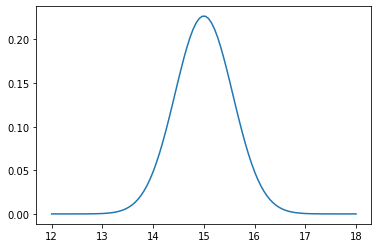

In [17]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

a = np.linspace(12, 18, 100)
# print(a)

def equation(x: list):
	# Mean
	mean = np.mean(a)
	# SD
	sum = 0
	for i in a:
		sum += (i - mean)**2
	SD = ( sum / (len(a)-1) )**0.5
	# return SD
	leftPart = 1 / ( SD * (2*np.pi)**0.5 )
	rightPart = np.e**( -((x-mean)**2) / 2*(SD**2) )
	return leftPart*rightPart

sns.lineplot( x=a, y=equation(a) )

equation(a)



Text(0.5, 1.0, 'Probability (QQ) plot for normally-distributed data')

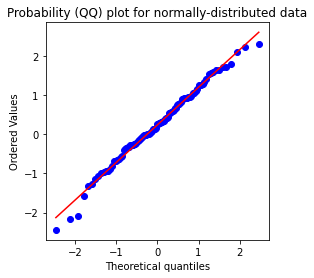

In [45]:
from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.title('Probability (QQ) plot for normally-distributed data')



((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

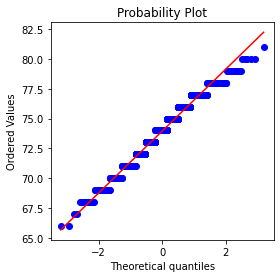

In [48]:
# still roughly normal

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = player_data_import['height_inches'].sample(1000)
stats.probplot(norm_sample, plot=ax)

## Long-tailed

E.g. distribution of household incomes = right-skewed graph, as the tail is on the right. 



## Student's t-distribution 

A normally shaped distribution that is thicker and has longer tails.  

We can use t-distribution if our sample size <u>is less than 30</u>, otherwise we can assume normal distribution as per the CLT. 

Also called Student's t distribution (1908, *Biometrica*, W.S.Gosset aka Student).

<img src="Media/z-t-distributions.png" width="430"/>

90% CI around the sample mean: 

$ \overline{x} \pm t_{n-1}(0.05) \frac{s}{\sqrt{n}} $

, where $n$ - sample size, $t_{n-1}(0.05)$ is the t-statistic value with n-1 degrees of freedom, "excluding" 5% distribution at the two ends. 

## Bernoulli distribution

- Bernoulli event (trial, experiment): even with only two outcomes - success (X=1) and failure (X=0). 
- The Bernoulli distribution represents the success or failure of a single Bernoulli trial. 

$P(X=1) = p$

$P(X=0) = q = 1-p$

<img src="Media/Bernoulli_distribution.png" width="300"/>


## Binomial distribution

- Two independent trials with outcomes P1 and P2, with probabilities p and q=(1-p)
- Binomial distribution reports the probability of getting exactly $x$ P1 events in the course of $n$ independent (probability of event does does not depend on how many times it has previously been used) Bernoulli trials. Binomial experiment = repeat Bernoulli event N times. Distribution of successes in n trials. 
- The binomial distribution is defined by only two parameters - p and n. Binomial distribution for coin flip - bell-shaped; but this is not necessarily always the case. 

Formula for probability:

$$ P(x) = {n \choose x} p^{x} q^{n-x} = \frac{n!}{(n-x)!x!} p^{x} q^{n-x} $$
, where $p$ - probability of success, $q=1-p$ - probability of failure, $n$ - total number of trials, $x$ - number of successes, $n-x$ - number of failures. 


A random variable is binomial if:
- The outcome of each trial has only two options (e.g. success or failure)
- Each trial is identical and independent of the others (result of one trial doesn’t affect the results of the other subsequent trials)
- There is a fixed, clearly-defined number of trials
- The probability p of success on each trial remains constant


<img src="Media/Binomial-distribution.png" width="800"/>

x-axis, number of heads in 200 coin flips. 


> Example: 80% of business startups generate a profit in their first year. Find the probability that in a sample of 10 startups, 7 will generate a profit in their first year. 
> 
> $$P(x=7) = {10 \choose 7} * 0.8^{7} * 0.2^{10-7} = 0.2013$$ 

In [53]:
# The Probability Mass Function (PMF) - probability that an event will happen a certain number of times, given a certain number of samples and probability for success; 
# Cumulative Density Function  - probability that an event will happen a certain number or fewer times
stats.binom.pmf(2, n=5, p=0.1) 
stats.binom.cdf(2, n=5, p=0.1)
# 2 = number of successes
# 5 = number of trials
# probability of clicking once (in each trial) = 0.1


0.99144

## Other distributions

- Chi-Square distribution
- Poisson
- Power law: $y = x^{constant}$
- Exponential distribution: $y = (constant)^{x}$
- F-distribution
- Weibull distribution

<img src="Media/Exponential-vs-powerlaw.jpg" width="500"/>


# Hypothesis testing

- Null hypothesis: no difference, and any difference between the groups is random; 
- Alternative hypothesis. 

<u>Hypotheses can be tested (and p-values obtained) by two methods</u>:
1. t-test etc.; 
2. randomization inference; 

Resampling: 
- Bootstrap; 
- Permutation (**to obtain p-values**):
  - Exhaustive permutation test: consider every possible permutation of the data;  
  - Random permutation (randomization): take a sample - perform randomisation R times; 
  - Bootstrap permutation test. 


Statistical significance:
- p-value: probability of obtaining results more or as extreme as the observed results by chance. E.g. in permutation test, it is the proportion of times permutation test produced a resulting difference that was equal or greater than the experimental difference. 
- alpha: a threshold of the result being considered extreme. Significance level. Typically, 0.10, 0.05, 0.01. If p-value <= alpha, reject H0; if p-value > alpha, do not reject H0; 
- Type 1 error (false positive): rejecting H0 when it's true; saying effect is real (when really it's due to chance)
- Type 2 error (false negative): not rejecting H0 when it's false; saying effect is due to chance (when really it's real)


<img src="Media/False_positive_etc.png" width="500">

Multiple testing:
- Alpha inflation: alpha (probability of commiting a type 1 error) increases with increasing number of tests. 
- Adjustment of p-values: adjustment for multiple tests. E.g. Bonferonni adjustment/correction, Tukey's HSD (honest significance test)
- **Bonferroni correction**: when testing n different hypotheses simultaneously, the resulting p-value must rise to a level of $\alpha/n$, in order to be considered as significant at the $\alpha$ level. Essentially, <u>divide the alpha by the number of comparisons</u>

ANOVA:
- Performs a single overall test showing whether there is a difference between multiple variables, with a single p-value; 
1. Combine all data; 
2. Shuffle, draw out resamples (the same amount of resamples as the original number of groups); 
3. Calculate mean of each of the resample and then calculate variance btw the groups, record the variance;  
4. Repeat steps 2-4 lots of times (1000x); 
5. p-value = proportion of times when the variance of resamples exceed or equals to the observed variance; 



## Statistical tests

**Independent samples** – subjects in one group do not provide info about subjects in the other group. They can’t be paired. E.g. medication trial has a control and a treatment group consisting of different individuals. **Dependent samples** – e.g. training program taking pretest and posttest scores from the same group of people. 


| Compare / measure what? | Example | Parametric test | Non-parametric test |
| - | - | - | - |
| Central tendency | Where is the center? | Mean | Median / mode |
| Measure of spread || SD | Quartiles and IQR |
| Compare sample mean to a known population mean | hypothesis test about a population mean, e.g. collected birth weights of people with SIDS, want to know whether the obtained average birth-weight of SIDS subjects is different from the national average of 3300g. | One-sample t-test | Wilcoxon test, sign test |
| Measure one group at two different times; dependent groups - 1 variable, 2 categories, within-subjects | Examine students' diagnostic test results before and after studying. E.g. insulin rate in 30 patients before and after the medical treatment. Every patient is associated with two measurements. | Paired t-test | Wilcoxon signed-rank test, Wilcoxon Rank sum test |
| Compare means between 2 independent groups (1 variable, 2 categories, between subjects) | Do male managers have higher average salaries than the female managers? | Unpaired t-test (independent samples t-test) | Mann-Whitney U test |
| Compare means between 3+ independent groups (1 variable, 3+ categories, between subjects) | Is there a difference in crop yield if a farmer uses fertiliser A, B, or C? | One-way ANOVA | Kruskal-Wallis test (Kruskal-Wallis H test) |
| 1 variable, 3+ categories, within-subjects || repeated measures ANOVA | Friedman test, ANOVA on ranked data |
| Estimate the degree of association between two variables | Does the number of hours a person spends on social media affects the number of hours they sleep at night? | Pearson correlation coefficient | Spearman's rank correlation |



## Random permutation test

By re-randomising the results, you could tell the probability of obtaining the results you got just by random chance.

1. Combine the results from different groups into one dataset; 
2. Randomly draw resamples into groups of the same size as the original ones; 
3. Calculate statistic for the resamples; 
4. Repeat step 3 R times; 
5. Draw a permutation distribution of the test statistic.
6. If the observed difference lies within the set of permuted differences, then the observed difference is within the range that is produced by random chance. If it lies outside of the most of permutation distribution, -> conclude that the difference is not by random chance -> statistically significant. 

> **Example (from Khan academy)**:
> 
> Giovanna usually takes bus B to work, but she thinks but A can be faster. 
> 
> She randomized 50 workdays between two groups: treatment (bus A) and control (bus B)
> At the end of the 50 days, she recorded $median(A) - median(B) = -8$, meaning that the median travel duration for bus A is 8 minutes less than that for bus B, from this experiment.
>  
> To test whether the results could be explained by random chance, she performed 1000 re-randomizations of data (where she took the results from those 50 days, redistributed them into the two groups randomly, calculated the difference of medians, and then performed the whole procedure again 1000 times). 
> Below is the table of re-randomization results (rounded values):
> 
> According to the simulations, what is the probability of the treatment group's median being lower than the control group's median by 8 minutes or more? 
> 
> From the table below, we calculate that the frequency as extreme as the obtained result or more is $(8+85)/1000 = 0.093$, meaning that probability of obtaining the same or more extreme result by random is 9.3% - the result is not statistically significant. 

| $median(A) - median(B)$ | Frequency |
| - | - |
| -10 | 8 |
| -8 | 85 |
| -6 | 97 |
| -4 | 161 |
| -2 | 83 |
| 0 | 127 |
| 2 | 93 |
| 4 | 159 |
| 6 | 107 |
| 8 | 62 |
| 10 | 18 |




3.5
[15, 16, 17, 19, 16, 18, 19, 21, 17, 22, 22, 21]
Observed difference between group A and group B: 3.5
We find the difference that is the same or better, but by random chance, in 0.8500000000000001% cases
Statistically significantly group B is higher than group A: True (p = 0.0085)


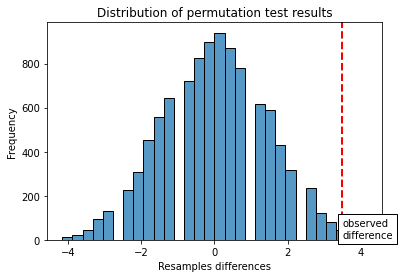

In [154]:
# random Permutation test
import numpy as np, random
import matplotlib.pyplot as plt, seaborn as sns

# AB test
groupA = [15, 16, 17, 19, 16, 18]
groupB = [19, 21, 17, 22, 22, 21]
# Original difference
difference = np.mean(groupB) - np.mean(groupA); print(difference)

# combine results
combined_results = groupA + groupB; print(combined_results)
# Perform numerous tests
permutation_diffs = []
for i in range(10000):
	# shuffle
	random.shuffle(combined_results); 
	# Draw two resamples
	resampleA, resampleB = combined_results[:len(groupA)], combined_results[len(groupA):]
	# print(resampleA)
	# print(resampleB)
	permutation_diffs.append(np.mean(resampleB) - np.mean(resampleA))


# print(permutation_diffs)

sns.histplot( x=permutation_diffs, bins=30 )
plt.title('Distribution of permutation test results')
plt.xlabel('Resamples differences')
plt.ylabel('Frequency')

plt.axvline(difference, color='red', linewidth=2, ls='--')
plt.text(difference, 8, "observed\ndifference", bbox={'facecolor':'white'})

# How many times (what percentage of cases) do we observe the observed difference by chance?
difference_chance = np.mean( permutation_diffs >= (difference) )
print(f"Observed difference between group A and group B: {difference}")
print(f"We find the difference that is the same or better, but by random chance, in {difference_chance * 100}% cases")
p_value = difference_chance
print(f"Statistically significantly group B is higher than group A: {p_value < 0.05} (p = {p_value})") 
# If true, then the observed difference btw groups is outside range of variation by random chance and is statistically significant


## Student's t-test

> E.g. to determine if means of two sets of data are significantly different from each other. 

- One-sample t-test: compare sample mean to population mean
- Independent two sample t-test: compare means of two independent groups
- Paired samples t-test: compare mean of a group before and after a treatment. 

$S$, standard deviation. 

$$ t = \overline{x} \pm t_{\alpha/2} * \frac{ S }{ \sqrt{n-1} } $$

_**Example of one sample t-test**_:
- Mean to test: 65000, 95% confidence
- Sample: $\overline{x} = 62456.2$, $S = SD = 2418.4$, $n=30$, $\alpha = 0.05$
- Look up in the t-table: for 29 DoF and alpha = 0.05, $t = 1.699$, therefore, interval is $(x,y) = 62456.2 \pm 1.699 * \frac{2418.4}{ 5.39 } = (61693.89, 63218.51)$


<img src="Media/t-test.png" width="500">


## A/B testing

Check which of the two treatments (control or treatment) is better.

Test statistic (metric) - such as conversion / no conversion. 

## Chi-Square test

For chi-square test, the number of each expected observation needs to be at least 5. 

Experimental data:
| Action | Headline A | Headline B | Headline C |
| - | - | - | - |
| Click | 14 | 8 | 12 |
| No-click | 986 | 992 | 988 |

Step 1. Rewrite contingency table with expected values for each group:

$mean(click) = 11.33$

$mean(no-click) = 988.67$

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 11.33 | 11.33 | 11.33 |
| No-click | 988.67 | 988.67 | 988.67 |

Step 2. Calculate Pearson residual and the chi-square statistic: 

$R = \frac{observed-expected}{\sqrt{expected}}$

Pearson residuals:

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 0.792 | -0.990 | 0.198 |
| No-click | -0.085 | 0.106 | -0.021 |

$$ X = \sum_{i}^{r} \sum_{j}^{c} R^{2} = \sum (\frac{(observed-expected)^{2}}{expected}) $$ 
, r and c - numbers of rows and columns. 

X = 1.666. 

Steps 1 and 2 we did once for our experimental data. Now for resampling: 

Step 3. Repeat steps 1 and 2 1000x times, each time record the X statistic. 

Step 4. Calculate p-value and check where the observed X statistic is on the sampling distribution of X resamplings; 

In [9]:
import random, numpy as np

box = [1] * 34
box.extend([0] * 2966)

random.shuffle(box)

def chi2(observed, expected):
	""" Returns X^2 for a given column """
	pearson_residuals = []
	for row, expect in zip(observed, expected):
		pearson_residuals.append([(observe - expect)**2 / expect for observe in row])
	# Return the sum of squares
	return np.sum( pearson_residuals )

# First, calculate X^2 for observed data
expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks

expected = [ 34/3, 1000 - 34/3 ]
chi2observed = chi2( [[14,8,12], [986,992,988]], expected )
print(f"X^2 observed: {chi2observed:.4f}")

def perm_fun(box):
	sample_clicks = [sum(random.sample(box,1000)), sum(random.sample(box,1000)), sum(random.sample(box,1000))]
	sample_noclicks = [1000-n for n in sample_clicks]
	return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for i in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f"resampled p-value: {resampled_p_value:.4f}")

X^2 observed: 1.6659
resampled p-value: 0.4490


## Fisher's exact test

While chi-square applies an approximation, Fisher's exact test enumerates all possible permutations and gives an exact p-value. 

# AI

**History**:
- The term "AI" was coined in 1956 at Dartmouth College conference; 
- 1974 - 1980: AI winter
- 1980-1987: boom
- 1987 - 1993: the second AI winter
- AI revolution: 
  - 1997: Deep Blue beat the chess champion Garry Kasparov; 
  - Two reasons: computing power and data (due to the internet and social media)

**First versions**:
- 1958 - perceptron - first supervised ML machine: classified trinagles and circles by Frank Rosenblatt. 

Branches of AI:
- ML: supervised, unsupervised, reinforcement learning; 
- Deep Learning: uses Neural Networks; 
- NLP
- Robotics



In [ ]:
loan200 = pd.read_csv('example_datasets/load200.csv')
loan200



## ML

**Supervised ML**:
- learning with training labels
- <u>adsf</u>: 
- Logistic regression; 
- Linear discriminant analysis (LDA); uses Bayes' theorem. 
- K-nearest neighbours (KNN): parameter K can alter accuracy; 

Confusion matrix:
TP, TN, FP, FN

| | Classifies as `x` | Classifies as `y` | Total |
| - | - | - | - |
| It is `x` | **8** | **17** | 25 |
| It is `y` | **2**| **73** | 75 |
| Total | 10 | 90 | 100 |

$accuracy = \frac{TP + TN}{totalCases} = \frac{8+73}{100} = 81\% $

**Unsupervised ML**:
- Learning without training labels. Cannot calculate accuracy scores. 
- Types:
- K-means; 
- Hierarchical clustering; 
- Subclusters

**Reinforcement learning**:
- learning from feedback. 

## Neural Networks

Has input layer, hidden layers, and output layer. 

Examples: 
- Detect fraud in banks; 
- Microscope - recognise cancer cells; 
- Recognise voice. 

Training neural networks:
Neural networks consist of architecture (neurons and their connections) and their weights. 

Optimisation - adjusting weights. 

Backpropagation of the error - algorithm to teach NN: error from output layer propagates back, adjusting weights. 

Overfitting. 



In [5]:
# Step 1 : labelled dataset
# EMNIST letter chunks 

from emnist import extract_training_samples


# Grab the data from OpenML website
# X - images, y - labels
X, y = extract_training_samples('letters')
# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


Image label: g


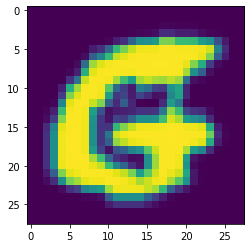

In [15]:
import matplotlib.pyplot as plt

img_index = 1 # Change this as different examples
img = X_train[img_index]
print("Image label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [16]:
# MLP (multi-layer perceptron network)
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Our NN will have:
# - 28 px * 28 px = 784 neurons (input layer)
# - 26 neurons (english alphabet characters) = output layer

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlpl = MLPClassifier(
	hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, 
	solver='sgd', verbose=10, tol=1e-4, random_state=1, 
	learning_rate_init=.1)

print('Created our first MLP network')


Created our first MLP network


In [17]:
# Train and test

mlpl.fit(X_train, y_train)
print(f"Training set score: {mlpl.score(X_train, y_train)}")
print(f"Test set score: {mlpl.score(X_test, y_test)}")


Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.8865
Test set score: 0.8408


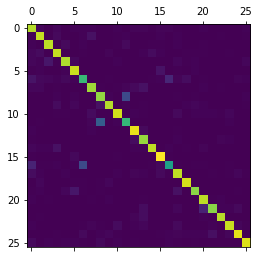

In [19]:
# Create confusion matrix

# Initialise a list with all the predicted values from the training set
y_pred = mlpl.predict(X_test)

# Visualise the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

# Regression

Monotonic relationship: a relationship where two variables have the same sign of change, e.g. move in the same direction. This can be linear (two variables change at the same rate) or non-linear (change at different rates).

<img src="Media/Residuals.png" width="600"/>

**Simple linear regression**: relationship btw two variables. 

**Correlation** - enumerates direction and strength of a relationship. Enumerated by correlation coefficient. 

*Pearson's correlation coefficient (r)*: determines the strength of the linear relationship between the two normally-distributed variables. On scatterplot.
- multiply deviations from the mean of the two variables, divided by the product of SD for the two variables: 

$$ r = \frac{COVARIANCE(X, Y)}{S_{x}S_{Y}} = \frac{1}{n-1} * \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ S_{x} S_{y} } = \frac{ \sum_{i=1}^{n} ( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ \sqrt{ \sum(x-\overline{x})^{2} \sum(y-\overline{y})^{2} } } $$

- $-1 < r < 1$
- $r = 1$ - perfect correlation
- $r = 0$ - independent 

*For non-normally distributed data - Kendall, Spearman correlation coefficients.*

Coefficient of determination ($r^{2}$): measure of how close the data points are to the estimated regression line. $r^{2} = 0.902$ means that the regression equation provides a very good fit with 90.2% of the variation in RHR explained by the regression equation. 

**Regression** - writing up a formula to predict future outcomes. 

Equation of regression (best-fit) line: 

$ y = a + mx $ or :

$$ y = b_{0} + b_{1}x $$ 
, where y = response / dependent variable, b0 (a) - the intercept (a constant), b1 (m) - slope, x - predictor (independent) variable

Calculating this formula; r - correlation (e.g. Pearson r) btw X and Y, Sy, Sx - SD:

$ m = b_{1} = slope = r (\frac{S_{y}}{S_{x}}) = \frac{ \sum((x_{i}-\overline{x})(y_{i}-\overline{y})) }{ \sum(x_{i}-\overline{x})^{2} } $

$ intercept = a = \overline{y} - m\overline{x} $

**RMSE / RMSD** - the root mean square error / deviation: error around the regression line. Estimates the SD of y-values vertically. $\overline{y}_{i}$ - predicted value; $y_{i}$ - actual value. 

$$ RMSE = \sqrt{ \frac{ \sum(\overline{y}_{i} - y_{i})^{2} }{ N } } $$

## Simple linear

Sample size: 10
Mean values: 15.6 | 79.7
Sums of squared diff from the mean: 42.4 | 1206.1
Standard deviations: 2.171 | 11.576
Sum of products of differences from the mean of x and y: 134.8
Correlation coefficient r: 0.596
--------------------------------------------------
Slope m = 3.179
Intercept a = 30.104
Regression equation: y = 30.104 + 3.179x


<AxesSubplot:>

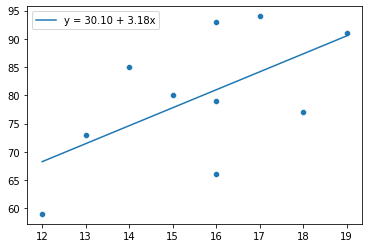

In [22]:
# Calculating linear regression by hand
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

N = len(x_variable)
print(f"Sample size: {N}")

x_mean, y_mean = np.mean(x_variable), np.mean(y_variable)
print(f"Mean values: {x_mean} | {y_mean}")



sum_squaredDiff_x = sum([ (x - x_mean)**2 for x in x_variable ])
sum_squaredDiff_y = sum([ (y - y_mean)**2 for y in y_variable ])
print(f"Sums of squared diff from the mean: {sum_squaredDiff_x} | {sum_squaredDiff_y}")

x_SD = np.sqrt( sum_squaredDiff_x / (N-1) )
y_SD = np.sqrt( sum_squaredDiff_y / (N-1) )
print(f"Standard deviations: {x_SD:.3f} | {y_SD:.3f}")

sum_product_diffFromMean_x_y = sum([ (x-x_mean)*(y-y_mean) for x, y in zip(x_variable, y_variable) ])
print(f"Sum of products of differences from the mean of x and y: {sum_product_diffFromMean_x_y}")

# Calculate correlation coefficient r
r = sum_product_diffFromMean_x_y / np.sqrt( sum_squaredDiff_x * sum_squaredDiff_y )
print(f"Correlation coefficient r: {r:.3f}")
print('-'*50)

# Calculate slope
m = r * (y_SD / x_SD)
print(f"Slope m = {m:.3f}")
# Calculate intercept
a = y_mean - m*x_mean
print(f"Intercept a = {a:.3f}")
# Derive the regression equation
print(f"Regression equation: y = {a:.3f} + {m:.3f}x")

sns.scatterplot(x=x_variable, y=y_variable)
x1 = np.arange(12, 20, 1)
sns.lineplot( x=x1, y= a + m*x1, label=f'y = {a:.2f} + {m:.2f}x' )

3.179245283018868 30.10377358490566
RMSE: 8.82
Actual equation with RMSE: y = (30.10 + 3.18x) +/- 8.82 


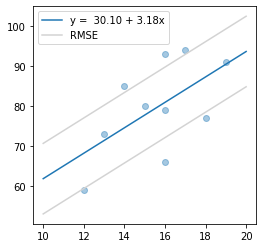

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x_variable = [17, 13, 12, 15, 16, 14, 16, 16, 18, 19]
y_variable = [94, 73, 59, 80, 93, 85, 66, 79, 77, 91]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_variable,y_variable)
print(slope, intercept)

fig = plt.figure(figsize=(4, 4))
x = np.arange(10, 21, 1 )
plt.plot( x, x*slope + intercept, label=f'y =  {intercept:.2f} + {slope:.2f}x' )
plt.scatter( x_variable, y_variable, alpha=0.4 )
plt.legend()


y_predicted = [ x*slope + intercept for x in x_variable ]
sum_squared_diff = sum([ (y_hat - y)**2 for y, y_hat in zip(y_variable, y_predicted) ])
rmse = ( sum_squared_diff/len(y_variable) )**0.5
print(f"RMSE: {rmse:.2f}")
print(f"Actual equation with RMSE: y = ({intercept:.2f} + {slope:.2f}x) +/- {rmse:.2f} ")

plt.plot( x, x*slope + intercept + rmse, color='lightgrey', label='RMSE' )
plt.plot( x, x*slope + intercept - rmse, color='lightgrey' )
plt.legend()

Intercept: 22.172
Coefficient exposure: -0.230
17.5627665989849


C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


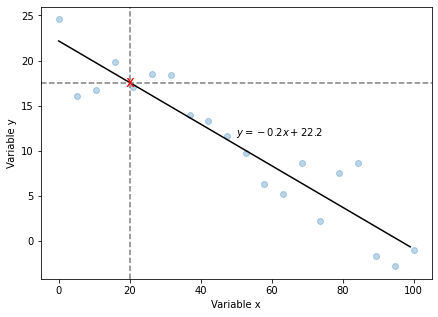

In [182]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np

# Generate semi-random dataset
dataset = pd.DataFrame({
	'Variable_x': np.linspace(0, 100, 20), 
	'Variable_y': [i + random.uniform(-5, 5) for i in range(20, 0, -1)]
})
dataset['Variable_y']

# Data Scatterplot
plt.figure(figsize=(7,5))
plt.scatter(dataset['Variable_x'], dataset['Variable_y'], alpha=0.3 )
plt.xlabel('Variable x'); plt.ylabel('Variable y')

# Linear Regression
model = LinearRegression()
# model.fit(lung[['Exposure']], lung['PEFR'])
model.fit(dataset[['Variable_x']], dataset['Variable_y'])
linreg_intercept = model.intercept_
linreg_coef = model.coef_[0]
print(f"Intercept: {linreg_intercept:.3f}")
print(f"Coefficient exposure: {linreg_coef:.3f}")

x_regline = np.arange(0, 100, 1)
plt.plot(x_regline, linreg_coef*x + linreg_intercept, color='black')
plt.text(50, model.predict([[50]])[0] +1, rf'$y = {linreg_coef:.1f}x + {linreg_intercept:.1f}$')

# Prediction of a specified value
x_value = 20
predicted_y = model.predict([[x_value]])[0]; print(predicted_y)
plt.text(x_value, predicted_y, 'x', size=15, color='red', ha='center', va='center')
plt.axhline(predicted_y, color='grey', linestyle='dashed')
plt.axvline(x_value, color='grey', linestyle='dashed')

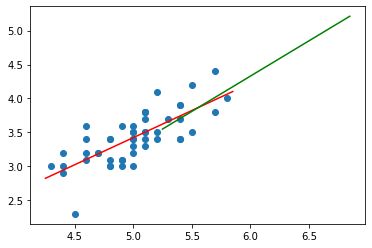

In [103]:
# MATPLOTLIB
# Linear regression

import pandas as pd, matplotlib.pyplot, numpy as np, pandas as pd, seaborn as sns
from scipy.stats import linregress

flowers_df = sns.load_dataset('iris')
df2 = flowers_df[flowers_df['species'] == 'setosa']
plt.scatter(df2['sepal_length'], df2['sepal_width'])

# Create line of best fit
correlation1 = linregress(df2['sepal_length'], df2['sepal_width'])
# slope, intercept, r, p, se = linregress(df2['sepal_length'], df2['sepal_width']) ## alternative way of writing it
x = np.arange(4.25, 6, 0.4)
y = correlation1.intercept + correlation1.slope * x
plt.plot(x, y, 'red', label='first LOBF')

# Create correlation to predict future correlation, taking into account some datapoints
df3 = df2[df2['sepal_length'] >= 5.25]
correlation2 = linregress(df3['sepal_length'], df3['sepal_width'])
x2 = np.arange(5.25, 7, 0.4)
y2 = correlation2.intercept + correlation2.slope * x2
plt.plot(x2, y2, 'green', label='seconds LOBF')

## Exponential

[6.93147181e-01 3.34966894e-15]


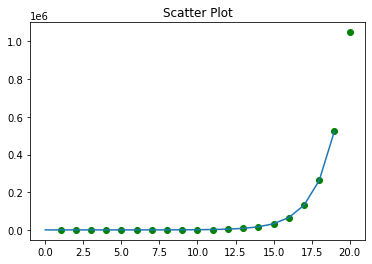

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# create the dataset

x = np.arange(1, 21, 1)
y = [2**i for i in x]
# x = np.arange(1, 21, 1)
# y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
#               33, 38, 44, 50, 56, 64, 73, 84, 97, 113])


#plotting the data
plt.scatter(x, y, color="green")
plt.title("Scatter Plot")
# plt.show()

#fit the model
# the model for our data is:
# y = A*exp{λt};
# Taking the log on both sides of y, we get
# log(y) = log(A) + λt

# So to fit our model, we first take the natural log on only the y variable and not t.

model = np.polyfit(x, np.log(y), 1) # the argument 1 idicates the degree of the polynomial
# view the model's output
print(model)

"""
log(y) = -0.11504963 - 0.0002615t

Let's simplify a bit:
b = -0.11504963; a = -0.0002615
log(y) = a + bt
e^log(y) = e^( a + bt )
y = exp(a) * exp(bt)
y = exp(a) * (exp(b))^t


"""
x_points = np.arange(0, 20, 1)
plt.plot(x_points, (np.e**model[1])*((np.e**model[0])**x_points) )

# Data Visualisations


In [1]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

## Main parameters

<img src="Media/named_colors_seaborn.webp" width="500"/>

```python

# Set axis limits
ax = plt.gca()
ax.set_xlim([xMin, xMax])

# Save the figure in high definition
plt.savefig(
	f'Figure name.png', format='png', 
	dpi=800, 
	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
)

# Change order of items in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

```


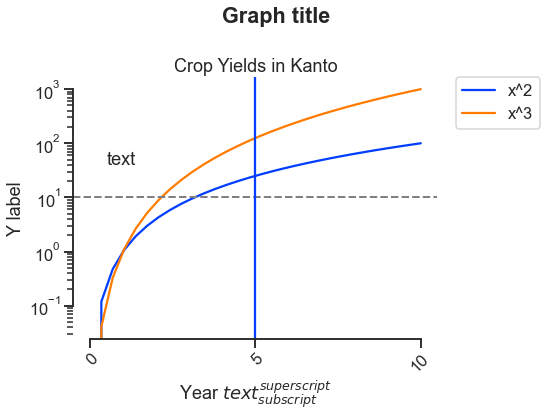

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# Basic elements of a plot: 

# Pre-sets of data in seaborn:
sns.get_dataset_names() # print all pre-made datasets in seaborn
sns.load_dataset('iris')
sns.load_dataset('tips')
sns.load_dataset('flights')
sns.load_dataset('exercise')
sns.load_dataset('penguins')

# Change figure size: 
plt.figure(figsize=(8,6))
x = np.linspace(0, 10, 30); plt.plot(x, x**2); plt.plot(x, x**3)

# Figure title
plt.suptitle("Graph title", weight = 'bold') # Common title for all figures
plt.title('Crop Yields in Kanto')

# Axes labels
plt.xlabel('Year $text_{subscript}^{superscript}$')
plt.ylabel('Y label')

# Axes ticks
plt.xticks([0, 5, 10], rotation = 45, ha='right', rotation_mode='anchor')

# Log scale
plt.yscale('log')

# Create a legend outside of the figure box
plt.legend(['x^2', 'x^3'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Horisontal / vertical line
plt.axhline(
	10, 
	color='grey', 
	linewidth=2, 
	ls='--' # linestyle = 'solid'
) # Horisontal
plt.axvline(5)

# Write text on the graph
plt.text(0.5, 40, s='text')

# Use if headings overlap
plt.tight_layout()

###########################################################################################################################
#####   Style   ###########################################################################################################
###########################################################################################################################

# Change scale
sns.set_context('talk') # paper, talk, notebook, poster
sns.set_context('talk', font_scale=1.25)
# Change plot style
sns.set_style('whitegrid') # white, whitegrid, dark, darkgrid, ticks
sns.set_style('darkgrid', {'axes.facecolor': '0.9'}) # Get more details here: https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
# different palettes
sns.set_palette('tab10') # brg, Set1, Set1_r, Set2, Set3, hls, viridis, Accent, Dark2, Dark2_r, Paired_r
# pastel, muted, deep, colorblind, bright, dark
# Change all above (with override of previous settings)
sns.set_theme(context='talk', style='ticks', palette='bright')

# Remove the top and right axes
sns.despine(trim=True) 

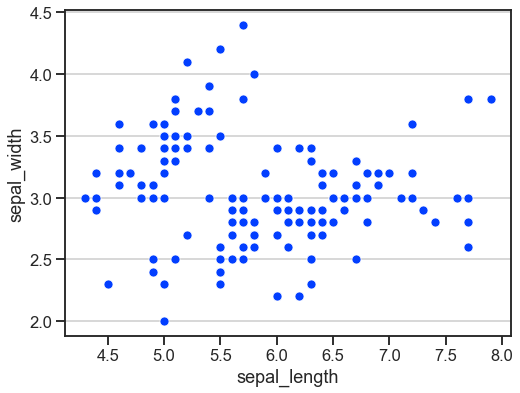

In [73]:
# for color can use HEX, e.g. #2c2cc7

df = sns.load_dataset('iris')
df

plt.figure(figsize=(8,6))
sns.set_context('talk')
graph = sns.scatterplot(
	x='sepal_length', y='sepal_width', data=df
)
sns.set_style('whitegrid', {
	# COLOURS
	'figure.facecolor': 'lightgreen', # outside figure background color
	'axes.labelcolor': 'green', # white intensity of axes labels ('0.5') OR input color name
	'axes.facecolor': '#d1abc7', # inside figure background color
	'xtick.color': 'red', # white intensity of x axes ticks ('0.5') OR input color name
	'ytick.color': 'red', # white intensity of y axes ticks ('0.5') OR input color name
	'axes.edgecolor': 'black', # colour of the axes outside square border
	'grid.color': 'purple',

	'axes.axisbelow': True, # Bool: position figure x and y axis below or above the actual data? 
	'grid.linestyle': '-', 
	'xtick.top': True, 'xtick.bottom': True, # Draw individual ticks for x axis
	'ytick.right': True, 'ytick.left': True, 
	'axes.grid': True, # Remove axes grid
	'axes.spines.left': False,
})
graph.yaxis.grid() # Remove horisontal axis

In [74]:
# COLORS

import seaborn as sns

# List of all available colours
sorted(sns.xkcd_rgb.keys())

# All red variants
[i for i in sns.xkcd_rgb if 'red' in i]

['blood red',
 'brick red',
 'bright red',
 'brown red',
 'brownish red',
 'burnt red',
 'cherry red',
 'dark red',
 'darkish red',
 'deep red',
 'dull red',
 'dusty red',
 'faded red',
 'fire engine red',
 'indian red',
 'light red',
 'lightish red',
 'lipstick red',
 'neon red',
 'orange red',
 'orangered',
 'orangey red',
 'orangish red',
 'pale red',
 'pastel red',
 'pink red',
 'pinkish red',
 'pinky red',
 'purple red',
 'purplish red',
 'red',
 'red brown',
 'red orange',
 'red pink',
 'red purple',
 'red violet',
 'red wine',
 'reddish',
 'reddish brown',
 'reddish grey',
 'reddish orange',
 'reddish pink',
 'reddish purple',
 'reddy brown',
 'rose red',
 'rust red',
 'rusty red',
 'tomato red',
 'violet red',
 'wine red']

## Global API vs OOP

In Matplotlib, we can use:
- Global API (invoking functions at the leve of the module `pyplot`)
- OOP interface: creating objects

| Global | OOP | 
| --- | --- |
| `plt.yscale('log')` | `ax.set_yscale('log')` |

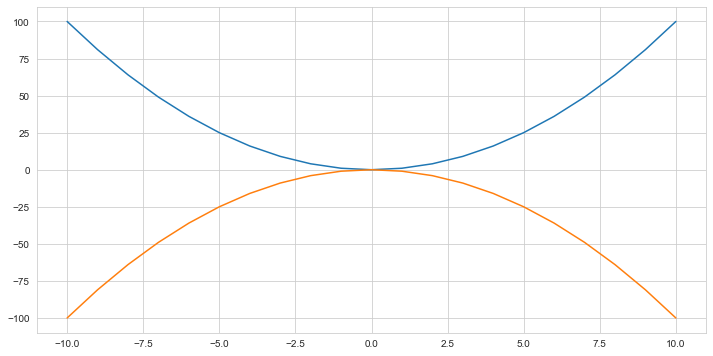

In [7]:

# Global API
import matplotlib.pyplot as plt, pandas as pd, numpy as np, seaborn as sns

plt.figure(figsize=(12, 6))

x = np.arange(-10, 11)
plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))
sns.set_style('whitegrid')

Text(0, 0.5, 'X squared')

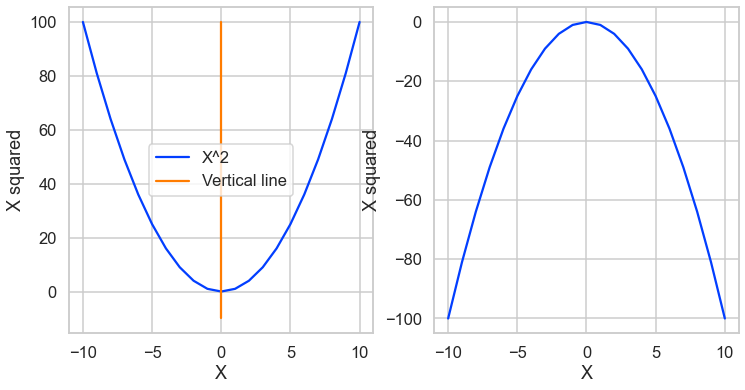

In [76]:
# Global API
import matplotlib.pyplot as plt, pandas as pd, numpy as np

x = np.arange(-10, 11)

plt.figure(figsize=(12, 6))
plt.title('My nice plot')

# Plot graph1
plt.subplot(1, 2, 1) # rows, columns, panel selected
plt.plot(x, x**2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical line'])
plt.xlabel('X')
plt.ylabel('X squared')

# Plot graph2
plt.subplot(1, 2, 2)
plt.plot(x, -1* (x**2))
plt.xlabel('X')
plt.ylabel('X squared')

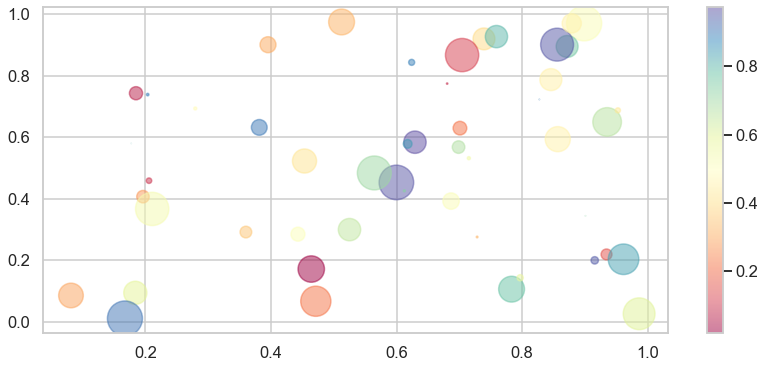

In [77]:
# Global API
N=50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.figure(figsize=(14, 6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


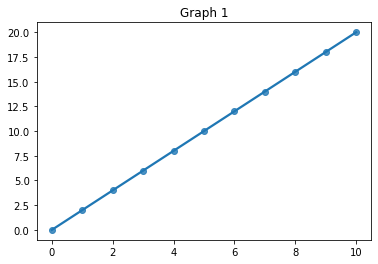

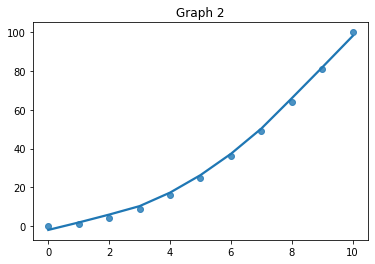

In [2]:
# OOP
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

x = np.arange(0, 10+1, 1)
graph1 = sns.regplot(x, x*2)
graph1.set_title('Graph 1')
plt.show()

graph2 = sns.regplot(x, x**2, lowess=True)
graph2.set_title('Graph 2')
plt.show()

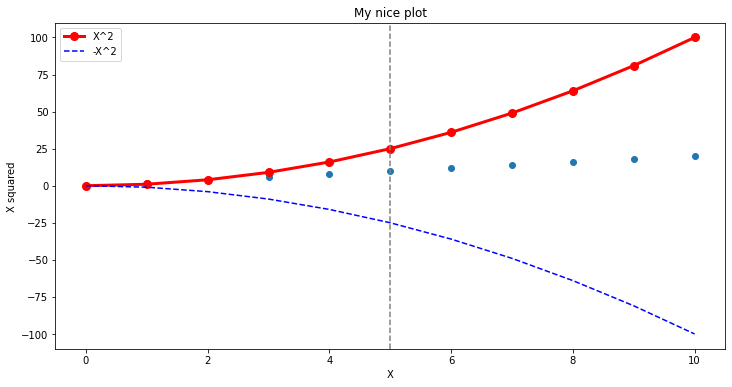

In [11]:
# OOP
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x**2, color='red', linewidth=3, marker='o', markersize=8, label='X^2')
axes.scatter(x, x*2)
axes.plot(x, -1* (x**2), 'b--', label='-X^2')
axes.axvline(5, color='grey', linestyle='dashed')
axes.set_xlabel('X')
axes.set_ylabel('X squared')
axes.set_title('My nice plot')
axes.legend()

# fig.set_size_inches(7,5)
# fig.set_dpi(100)


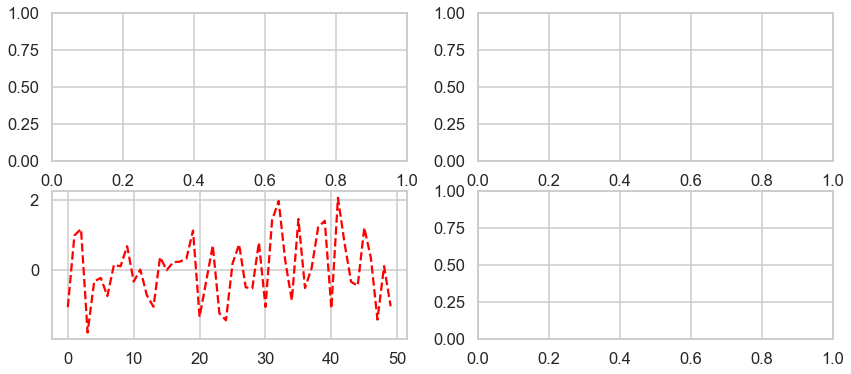

In [80]:
# OOP
# subplots ver1

plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects
plot_objects

ax3.plot(np.random.randn(50), c='red', linestyle='--')

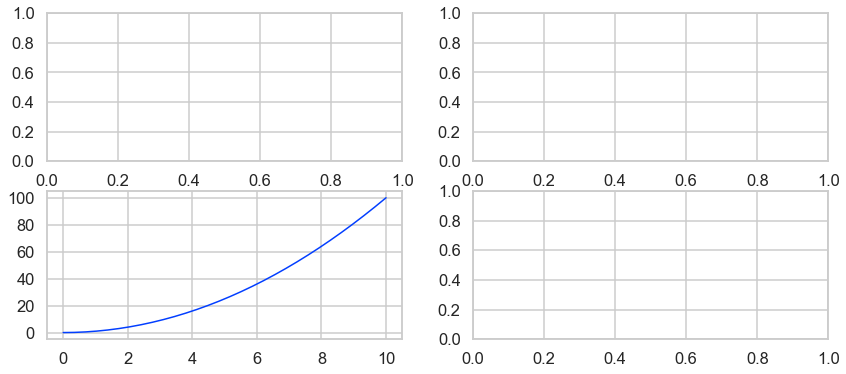

In [81]:
# OOP
# Subplots ver2

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))
sns.set_theme()

x = np.linspace(0, 10, 30)
axes[1,0].plot(x, x**2)

## Tabular representations of data

**Contingency table** (crosstabulation, cross table) - a useful way to summarise two categorical variables. 
- Top row = category 1, 
- left column = category 2, 
- cells = frequencies. 

<img src="Media/Crosstabulation.png" width="530"/>

<img src="Media/Contingency-table.png" width="400"/>

**Frequency distribution table**

Like a histogram in tabular form. 

<img src="Media/Frequency_distribution_table.png" width="250"/>

**Stem-and-leaf diagram**

<img src="Media/Stem_and_leaf.png" width="300"/>

**Two-way frequency table**
- Two-way relative frequency table if it’s expressed in percentage
you take two variables, one variable occupies column while another occupies rows, then calculate frequency

<img src="Media/Two-way_frequency_table.png" width="500"/>


## Dotplot

The number of dots in the plot equals to the number of observations. 

Variables: X - categorical, Y - numerical. 

<img src="Media/Dotplot.png" width="500"/>

<img src="Media/Dotplot_2.png" width="500"/>

## Scatterplot

Variables: X, Y - numeric continuous; 

Text(0.5, 1.0, 'Sepal dimensions')

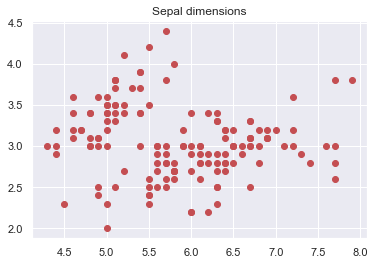

In [82]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
plt.plot(flowers_df['sepal_length'], flowers_df['sepal_width'], 'or')
# plt.plot('sepal_length', 'sepal_width', 'or', data=flowers_df) ## alternative way of writing
plt.title('Sepal dimensions')

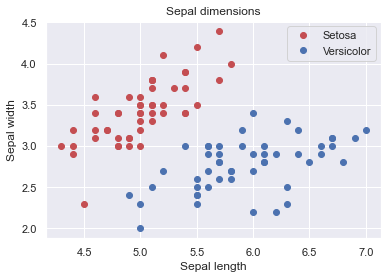

In [83]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
df2 = flowers_df[flowers_df['species'] == 'setosa']
df3 = flowers_df[flowers_df['species'] == 'versicolor']

plt.plot( df2['sepal_length'], df2['sepal_width'], 'or' )
plt.plot( df3['sepal_length'], df3['sepal_width'], 'ob' )

plt.title('Sepal dimensions')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa', 'Versicolor'])

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sepal dimensions')

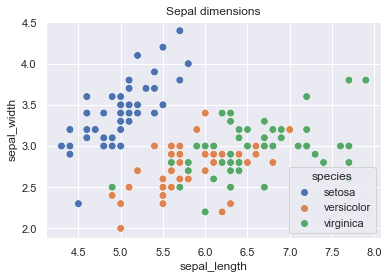

In [84]:
# SEABORN

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')

sns.scatterplot(
	flowers_df['sepal_length'], flowers_df['sepal_width'], 
	hue=flowers_df['species'], 
	s=60
)

# Alternative way to pass data:
# sns.scatterplot('sepal_length', 'sepal_width', data=flowers_df)

plt.title('Sepal dimensions')

## Stripplot

Scatterplot where one variable is categorical. 

Good addition to violin / box plot if you want to map individual observations. 

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

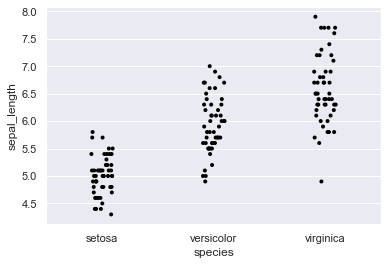

In [87]:
df = sns.load_dataset('iris')
df

sns.stripplot(
	x='species', y='sepal_length', data=df, 
	color='black', size=4
)

## Box (box-and-whiskers) plot

e.g. dataset {4, 4, 6, 7, 10, 11, 12, 14, 15}. Median (Q2) = 10; Q1 = 5, Q3 = 13, IQR = 13-5 = 8. 

<AxesSubplot:xlabel='variable'>

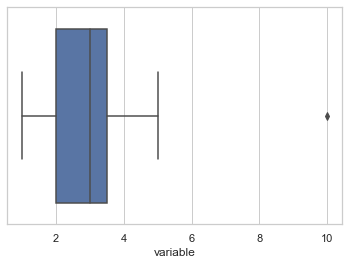

In [88]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df = pd.DataFrame({
	'variable': [1, 2, 3, 2, 2.5, 5, 10, 3, 4, 1, 3]
})
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['variable'])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

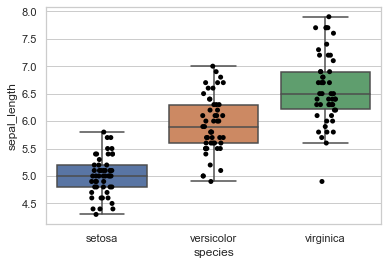

In [89]:
df = sns.load_dataset('iris')
df

sns.boxplot(   x='species', y='sepal_length', data=df, showfliers=False )
sns.stripplot( x='species', y='sepal_length', data=df, color='black' )


C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


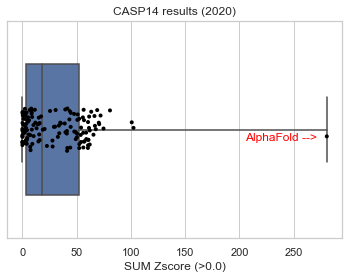

In [90]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


items_df = pd.read_csv('example_datasets/CASP14_2020.csv', sep='\t');

plt.title('CASP14 results (2020)');
# sns.set_theme(style="ticks");
sns.boxplot(items_df['SUM Zscore (>0.0)'], 
			whis=[0, 100], width=.6);
sns.stripplot(items_df['SUM Zscore (>0.0)'], 
			size=4, color='black', linewidth=0);

plt.text(205, 0.05, 'AlphaFold -->', color='red'); 

### Violin plot

An enhancement to the boxplot. 

It can show the nuances in the data distributions that are hidden in the boxplot. 

However, the outliers are less visible. 

## Bar plot

Count of single categorical variable. 

<img src="Media/Bar_plots.png" width="500"/>

Text(0.5, 1.0, 'Yield of oranges')

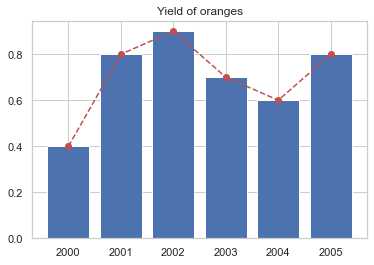

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, oranges);
plt.plot(years, oranges, 'o--r'); 
plt.title('Yield of oranges')

<BarContainer object of 6 artists>

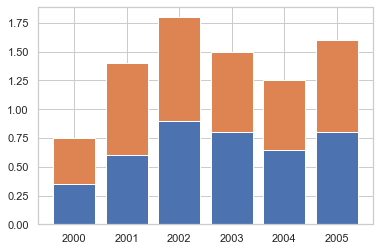

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked component bar graph

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples)

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='total_bill'>

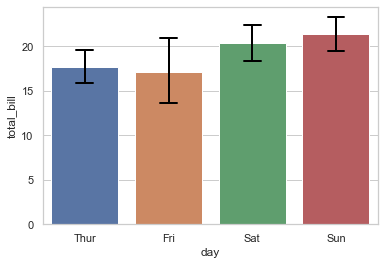

In [93]:
# Barplot
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

tips_df = sns.load_dataset('tips')
sns.barplot(
	tips_df.day, tips_df.total_bill, 
	errcolor='black', errwidth=2, capsize=0.2
)

# Alternative 

# bill_avg_df = tips_df.groupby('day')[['total_bill']].mean();
# plt.bar(bill_avg_df.index, bill_avg_df.total_bill);

In [94]:
import Bio
from Bio.Seq import Seq



dna = Seq("ATGATCTCGTAA")
rna = Seq("AUGUUCUCGUAA")

#### Plot of frequency of nucleotides / base 

import matplotlib.pyplot as plt
from collections import Counter

dna_freq = Counter(dna)

plt.bar(dna_freq.keys(), dna_freq.values())

ModuleNotFoundError: No module named 'Bio'

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='total_bill'>

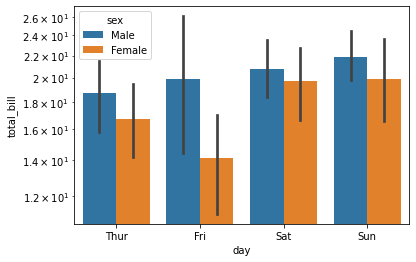

In [ ]:
# Grouped bar plot
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(
	'day', 'total_bill', data=tips_df, 
	hue='sex', 
	log=True
)

# flip the graph
# sns.barplot('total_bill', 'day', hue='sex', data=tips_df); # here, the graph is flipped

Index(['sample_N', 'runtime', 'hypercubes_found', 'algorithm'], dtype='object')


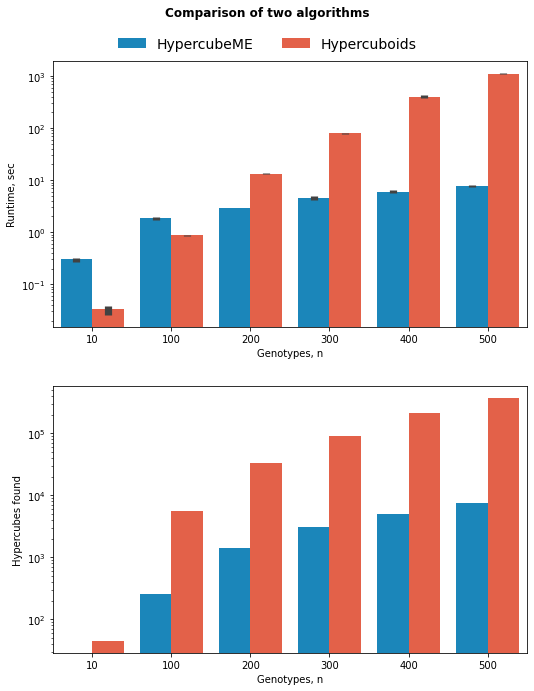

In [ ]:
# ticks btw each log power are not equal

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib as plt

items_df = pd.read_csv('example_datasets/Hypercuboids_data.csv', sep = ',')
# print(items_df)
print(items_df.columns)
############################################################################################

fig, axes = plt.subplots(
	2, 1, 
	figsize = (8,10), 
	# sharex=True
)

plt.suptitle("Comparison of two algorithms", weight = 'bold') # Common title for all figures
plt.style.use('fivethirtyeight')

# axes[0].set_title('Comparison of runtimes of the two algorithms')
sns.barplot(
	x='sample_N', y='runtime', data=items_df, 
	hue='algorithm', 
	log=True, 
	ax = axes[0]
)
axes[0].set_xlabel("Genotypes, n")
axes[0].set_ylabel("Runtime, sec")
axes[0].get_legend().remove()
fig.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor = (0.5, 0.9))

# axes[1].set_title('Comparison of hypercuboids found by the two algorithms')
plot1 = sns.barplot(
	x='sample_N', y='hypercubes_found', data=items_df, 
	hue='algorithm', 
	log=True, 
	# legend='Hide',
	# legend = False,
	ax = axes[1]
)
axes[1].set_xlabel("Genotypes, n")
axes[1].set_ylabel("Hypercubes found")
# axes[1].legend()
axes[1].get_legend().remove()

plt.tight_layout(pad=2)

## Histogram

Shows frequencies of intervals into which the data is subdivided, while losing identities of individual observations. Count of single numerical variable. 

A subset of histogram is a **pictograph** - quantity represented by quantity of pictures: 

<img src="Media/Pictograph.png" width="300"/>

### Univariate

Text(0.5, 1.0, 'Distribution of Sepal Width')

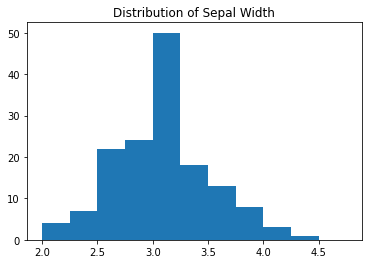

In [ ]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df['sepal_width'], 
	# bins=10,
	bins=np.arange(2, 5, 0.25) 
	# bins=[1, 3, 4, 4.5]
);

plt.title('Distribution of Sepal Width')


(array([ 3.,  6., 12., 13., 14.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
        4.75]),
 <BarContainer object of 11 artists>)

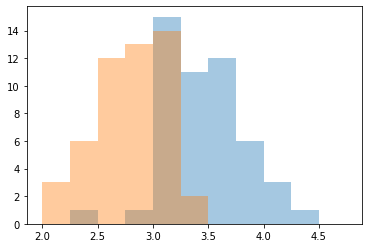

In [ ]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25), 
)

plt.hist(
	flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25)
)

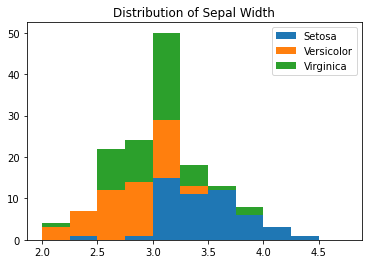

In [ ]:
# stacked histogram
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
flowers_df = sns.load_dataset('iris')

plt.hist(
	[
		flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'virginica']['sepal_width']
	], 
	stacked=True, 
	bins=np.arange(2, 5, 0.25)
)

plt.title('Distribution of Sepal Width'); 
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

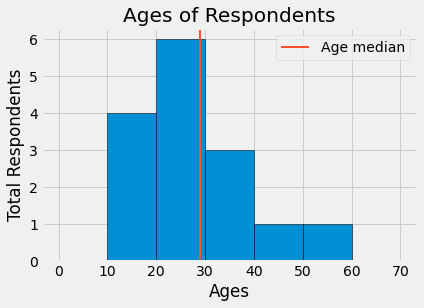

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

ages = [18, 18, 17, 20, 23, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55,]
bins = [0, 10, 20, 30, 40, 50, 60, 70]
# data = pd.read_csv('data.csv')
# ids = data['Column_name1']
# ages = data['Column_name2']

plt.hist(
	ages, 
	# bins = 30, 
	bins = bins,
	edgecolor = 'black', 
	# log=True
)

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.axvline( # Plots a vertical line
	29, color='#fc4f30', label='Age median', 
	linewidth=2
) 

plt.legend()

# plt.tight_layout()

### Bivariate

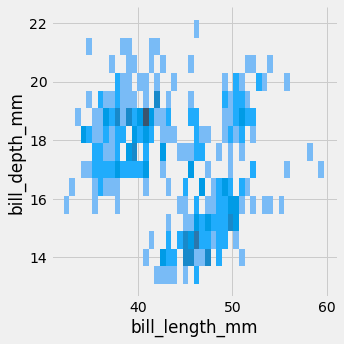

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	
	# log_scale=(True, False)
)



C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


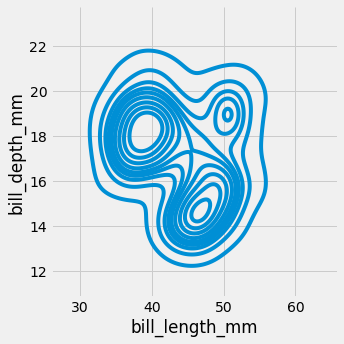

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	kind='kde'
	
	# log_scale=(True, False)
)



## Density plot (KDE)

Density plot (kernel density estimate) - smoothed histogram. 

Density curves show probability. The area under the curve equals to 100% of all possibilities. 
Like histogram but:
- Y axis is not frequency, but percentage of the total amount
- There are infinite number of infinitely-small bars


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

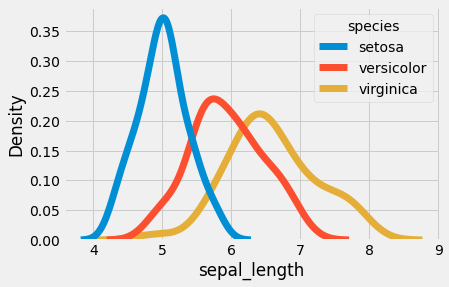

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.kdeplot(
	x='sepal_length', data=iris, hue='species', 
	lw=7
)

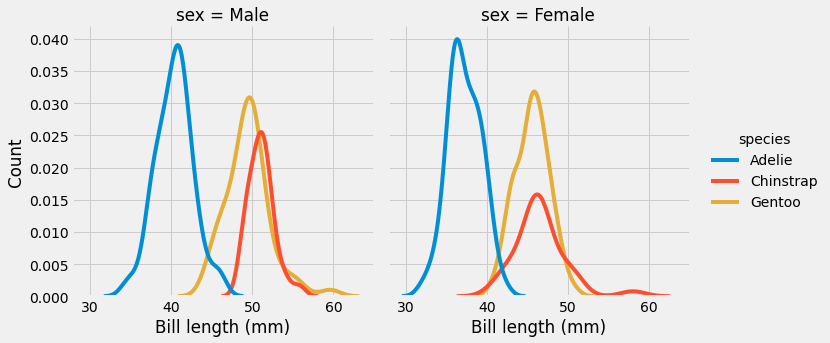

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

graph = sns.displot(
	data=df, x='bill_length_mm', 
	hue='species', col='sex',
	# binwidth=0.6, 
	kind='kde'
)

graph.set_axis_labels('Bill length (mm)', 'Count')


## Line plot

plt.plot arguments: 
- ```color, c```: set the color of the line 
- ```linestyle, ls```: 	choose between a solid or dashed line
- ```linewidth, lw```:	set the width of a line
- ```markersize, ms```:	set the size of markers
- ```markeredgecolor, mec```:	set the edge color for markers
- ```markeredgewidth, mew```:	set the edge width for markers
- ```markerfacecolor, mfc```: set the fill color for markers
- ```alpha```: opacity of the plot
- ```fmt = '[marker][line][color]'```: e.g. fmt=[s--b]; this argument provides a shorthand for specifying the line style, marker, and line colour

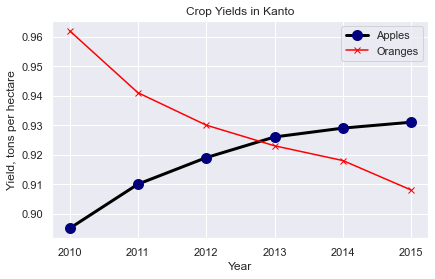

In [ ]:
# MATPLOTLIB

import pandas as pd
import matplotlib.pyplot as plt
# to ensure that plots are embedded within notebook cells, not as pop-ups
%matplotlib inline


df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})


plt.plot(df['years'], df['yield_apples'], marker='o', color='black', ls='-', lw=3, mew=5, mec='navy') # plot line 1
plt.plot(df['years'], df['yield_oranges'], marker='x', color='red') # plot line 2
plt.xlabel('Year'); plt.ylabel('Yield, tons per hectare') # print axis labels
plt.title('Crop Yields in Kanto') # print title
plt.legend(['Apples', 'Oranges'])

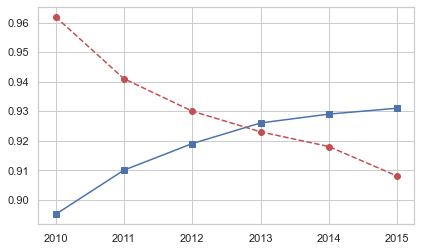

In [ ]:
# MATPLOTLIB + SEABORN STYLE

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'yield_cucumbers': np.random.uniform(0.7, 1, 6), 
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})



sns.set_style('whitegrid') # 'darkgrid'
plt.plot(df['years'], df['yield_apples'], 's-b')
plt.plot(df['years'], df['yield_oranges'], 'o--r') # 'or' = dot plot 
# plt.plot(df['years'], df['yield_cucumbers'], 'or')

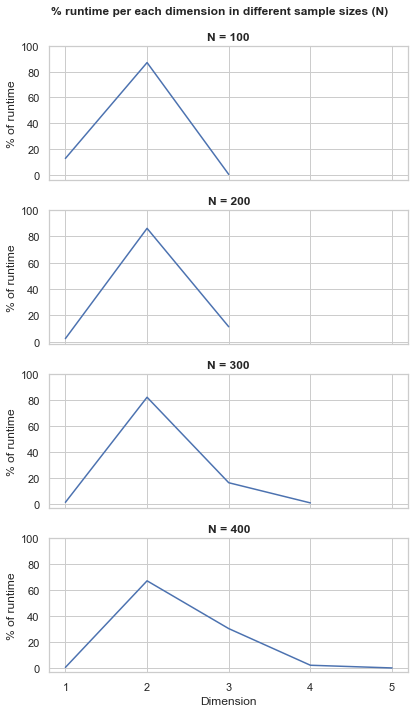

In [ ]:
# SEABORN
# Multi-subplot line plots

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#############################################################################################
#####   Data processing   ###################################################################
#############################################################################################
df = pd.read_csv('example_datasets/IPDS7_hyperrectangles_2.tsv', skiprows=1, sep='\t')

# Filter data
df = df[(df['Dimension'] != 'Total') & (df['IPDS7 sample size'] <= 400)]
# Print a new column with sum of 'Runtime (s)' for each group in 'IPDS7 sample size'
df['runtime_sum'] = df.groupby(['IPDS7 sample size'])['Runtime (s)'].transform('sum')
df['runtime_percent'] = (df['Runtime (s)'] / df['runtime_sum']) * 100

df

#############################################################################################
#####   Visualisation   #####################################################################
#############################################################################################
fig, axes = plt.subplots(
	4, 1, 
	figsize = (6,10), 
	sharex=True,
)

# Common varialbes
Samples = [100, 200, 300, 400]
ylabel="% of runtime"
yticks = [0, 20, 40, 60, 80, 100]
scatter_size = 90

plt.suptitle("% runtime per each dimension in different sample sizes (N)", weight = 'bold') # Common title for all figures
sns.set_style('darkgrid')
plt.tight_layout(pad=2)

sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 100], ax = axes[0] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 200], ax = axes[1] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 300], ax = axes[2] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 400], ax = axes[3] )

for i in range(0, len(Samples)):
	axes[i].set_ylabel(ylabel)
	axes[i].set_yticks(ticks=yticks)
	axes[i].set_title(f"N = {Samples[i]}", weight='bold')



[[<matplotlib.axis.XTick at 0x16095b945e0>,

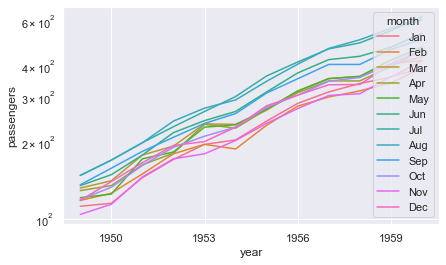

In [ ]:
df = sns.load_dataset('flights')

graph = sns.lineplot(x='year', y='passengers', data=df, hue='month')
graph.set(yscale='log')
graph.set(xticks=range(1950, 1960, 3))


<AxesSubplot:xlabel='Time', ylabel='Value'>

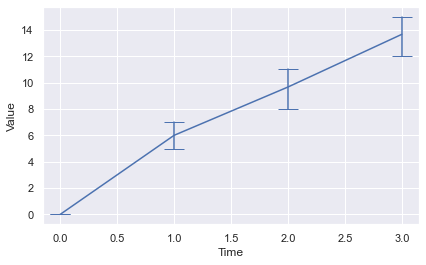

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

df = pd.DataFrame({
	'Time': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], 
	'Value': [0, 0, 0, 5, 6, 7, 10, 11, 8, 15, 14, 12]
})

sns.lineplot(
	x='Time', y='Value', data=df, 
	err_style='bars', 
	err_kws={'capsize':10}
)


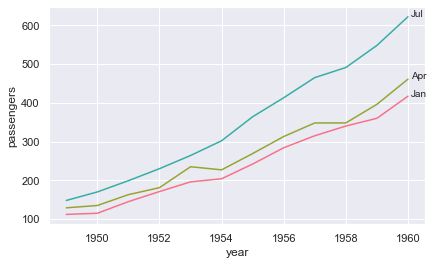

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

def TimeSeriesPerMonth(months: list):
	df = sns.load_dataset('flights')
	df2 = df[df['month'].isin(months)]
	sns.lineplot(x='year', y='passengers', data=df2, hue='month', legend=False)
	sns.set_style('whitegrid')
	for i in months:
		df3 = df2[(df2['month'] == i) & (df2['year'] == 1960)]
		plt.text(x=1960+0.1, y=df3['passengers'].iloc[0], s=i)

TimeSeriesPerMonth(['Jan', 'Apr', 'Jul'])

## Regplot

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


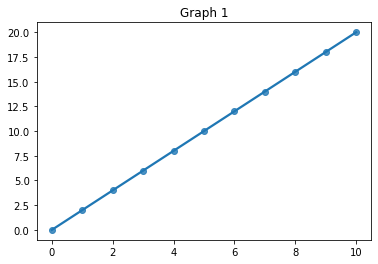

ModuleNotFoundError: No module named 'statsmodels'

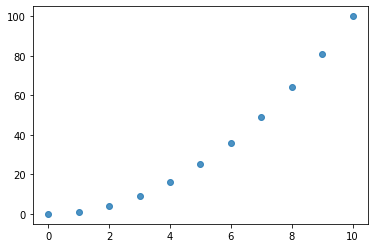

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

x = np.arange(0, 10+1, 1)
graph1 = sns.regplot(x, x*2)
graph1.set_title('Graph 1')
plt.show()

graph2 = sns.regplot(x, x**2, lowess=True)
graph2.set_title('Graph 2')
plt.show()

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


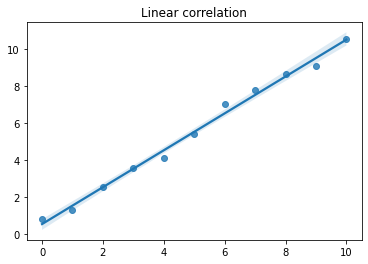

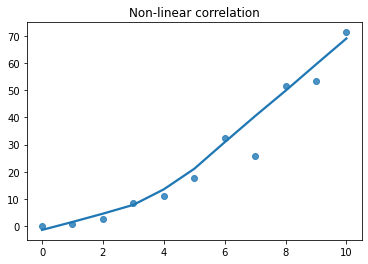

In [98]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Linear correlation
## The two variables change at the same rate

x = np.arange(0, 10+1, 1)
y = x + np.random.uniform(0, 1, np.shape(x))
graph1 = sns.regplot(x, y)
graph1.set_title('Linear correlation')
plt.show()

# Non-linear correlation
## Two variables change at different rates
x = np.arange(0, 10+1, 1)
y = (x**2) * np.random.uniform(0.5, 1, np.shape(x))
graph2 = sns.regplot(x, y, lowess=True)
graph2.set_title('Non-linear correlation')
plt.show()

# Monotonic 
## A relationship where two variables have the same sign of change, i.e. move in the same direction
## E.g. monotonic non-linear

## Jointplot

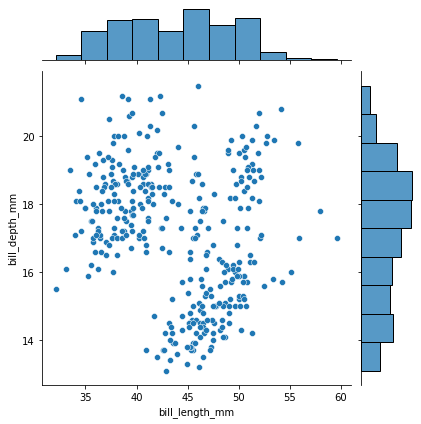

In [ ]:
import seaborn as sns

df = sns.load_dataset('penguins')
df

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df)

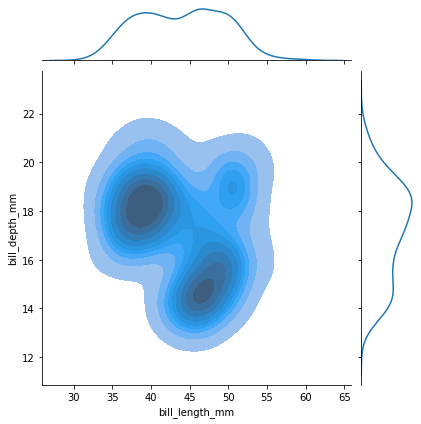

In [ ]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde', shade=True)

## Pairplot

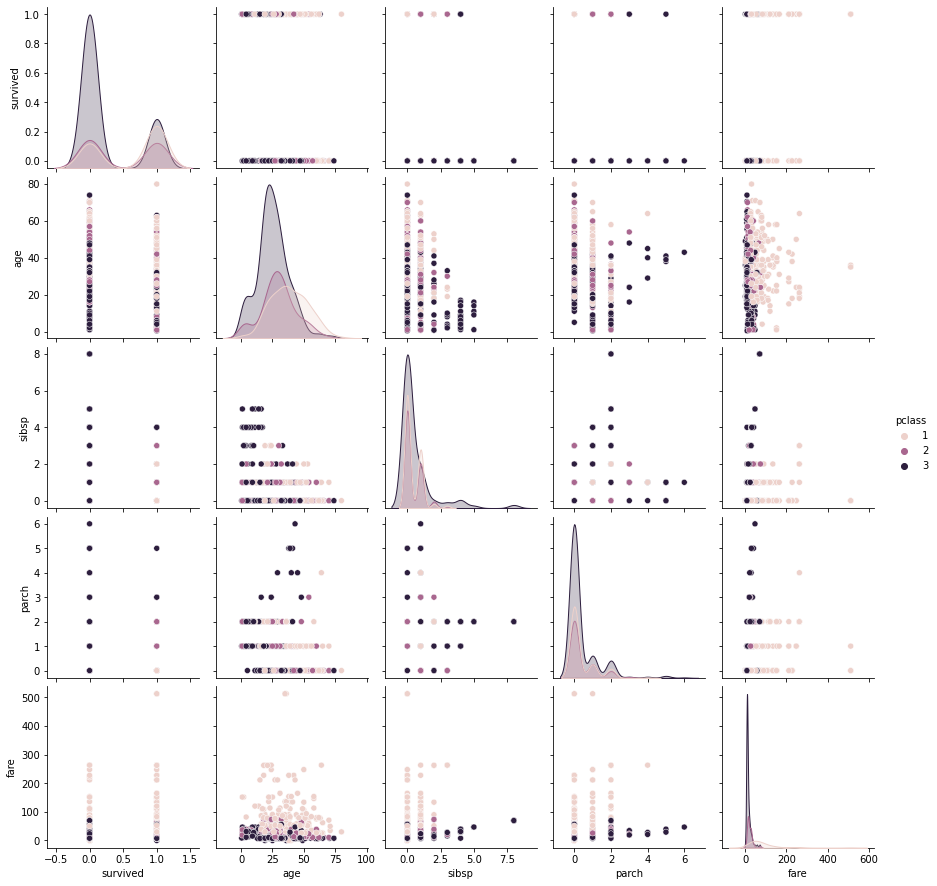

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

sns.pairplot(titanic.select_dtypes(['number']), hue='pclass')

## Cluster map

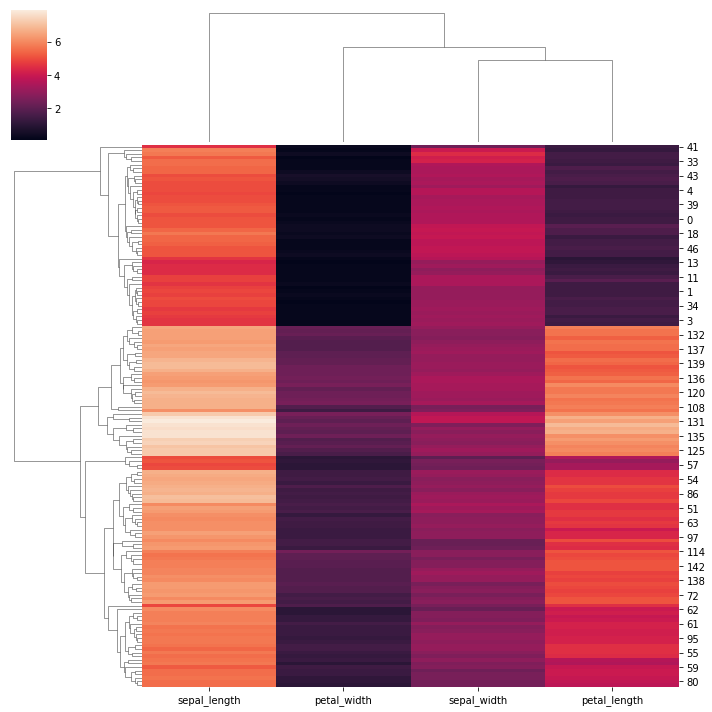

In [ ]:
iris = sns.load_dataset('iris')

sns.clustermap(iris.drop('species', axis=1))

## Pie chart

Each slide = category. 

Size of slice = frequency. 

<AxesSubplot:ylabel='Species'>

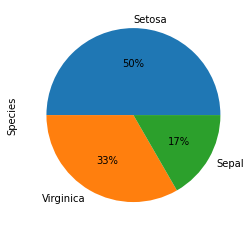

In [ ]:
# Quick visualisation
import pandas as pd


df = pd.DataFrame({
	'Species': ['Setosa', 'Setosa', 'Virginica', 'Setosa', 'Sepal', 'Virginica'], 
	'Sepal_length': [10, 11, 50, 70, 12, 51], 
	'Sepal_width': [100, 101, 50, 40, 99, 52]
})

# Quick pie chart - count of entries
df['Species'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.0f%%')

## Heatmap

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd

flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Text(0.5, 1.0, 'No. of passengers (1000s)')

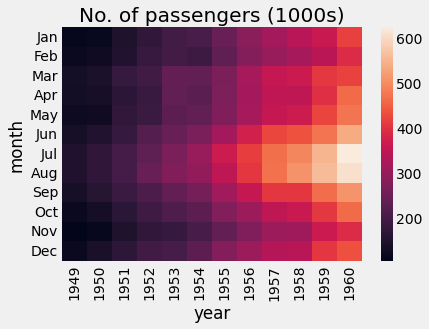

In [ ]:
# Heatmap

flights = sns.load_dataset('flights')


sns.heatmap(
	flights.pivot('month', 'year', 'passengers')
)
# heatmap arguments: 
## annot = True: displays the actual values
## cmap='Blues': changes the color palette
plt.title('No. of passengers (1000s)')


<AxesSubplot:xlabel='year', ylabel='month'>

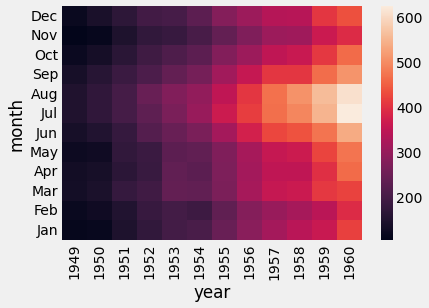

In [ ]:
flights = sns.load_dataset('flights')
flights['month'] = flights['month'].astype(
	str
) 

flights = flights.pivot('month', 'year', 'passengers')
flights 

a = [i for i in range(1949, 1961)]
b = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']

flights = flights.reindex(index=b, columns=a)
sns.heatmap(flights)

<AxesSubplot:xlabel='year', ylabel='month'>

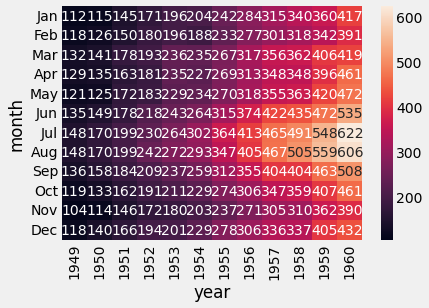

In [ ]:
import seaborn as sns
import numpy as np

example_four = sns.load_dataset('flights')
example_four = example_four.pivot('month', 'year', 'passengers')
# display_four = sns.heatmap(example_four)

sns.heatmap(
	example_four, 
	annot=True, 
	fmt='d'
)

['X1', 'X2', 'X10', 'S1']
['Y1', 'Y2', 'Y10']


C:\Users\evgen\AppData\Local\Temp\ipykernel_28240\4050538891.py:24: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  pivot = pivot.reindex(y_axis, ['Y1','Y2','Y10'])


<AxesSubplot:xlabel='var2', ylabel='var1'>

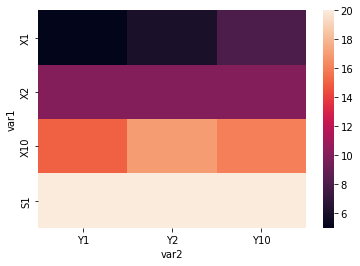

In [22]:
# A more complex heatmap, 
# where we perform alphanumerical sorting of the columns

df = pd.DataFrame({
	'var1': ['X1','X1','X1', 'X2','X2','X2', 'X10','X10','X10', 'S1','S1','S1' ],
	'var2': ['Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10'], 
	'value': [5,6,8, 10,10,10, 15,17,16, 20,20,20]
})
df

def sorted_nicely( l ): 
	import re
	""" Sort the given iterable in the way that humans expect.""" 
	convert = lambda i: int(i) if i.isdigit() else i 
	alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
	print(alphanum_key)
	return sorted(l, key = alphanum_key)

pivot = df.pivot('var1', 'var2', 'value')

y_axis = list(df['var1'].unique()); print(y_axis)
x_axis = list(df['var2'].unique()); print(x_axis)

pivot = pivot.reindex(y_axis, ['Y1','Y2','Y10'])

sns.heatmap(
	pivot
)


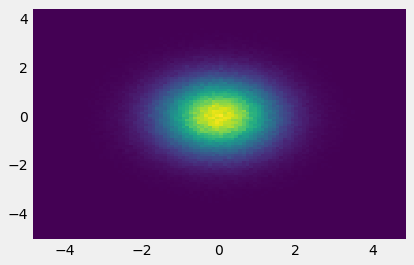

In [ ]:
# Fitness landscape with one fitness peak

import numpy as np
import matplotlib.pyplot as plt

# number of data points
N = 1000000

x = np.random.randn(N)
y = np.random.randn(N)
plt.hist2d(x,y,bins=100)
plt.show()



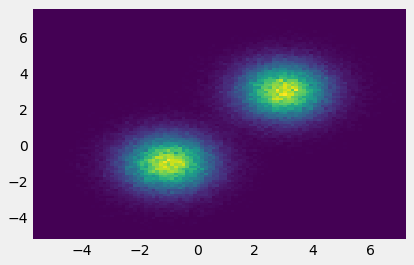

In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N = 100000
peak1 = -1
peak2 = 3


y = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
Y = np.concatenate([y, y2])

x = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
X = np.concatenate([x, x2])

plt.hist2d(X, Y, bins=100)

plt.show()



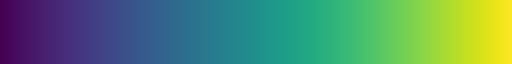

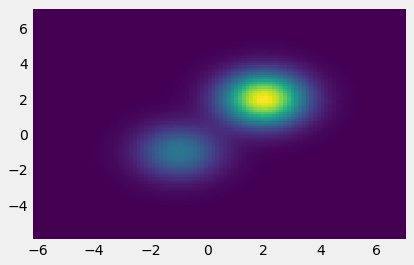

In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N1 =  4000000
N2 = 10000000
peak1 = -1
peak2 = 2

parameter = 1

y = np.random.normal(  peak1, parameter, N1)
y2 = np.random.normal( peak2, parameter, N2)
Y = np.concatenate([y, y2])

x = np.random.normal(  peak1, parameter, N1)
x2 = np.random.normal( peak2, parameter, N2)
X = np.concatenate([x, x2])

# plt.figure(figsize=(14, 14))
plt.hist2d(X, Y, bins=100, cmap='viridis')
matplotlib.cm.get_cmap(name='viridis')


# plt.show()
# plt.savefig(
# 	f'Figure name.jpg', format='jpg', 
# 	dpi=1000, 
# 	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
# )

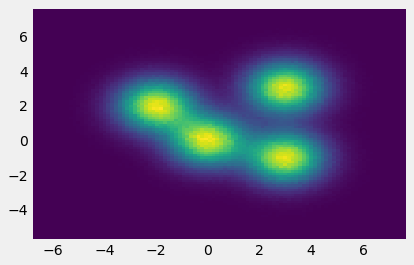

In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000000
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
y3 = np.random.normal(peak3[1], 1, N)
y4 = np.random.normal(peak4[1], 1, N)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()


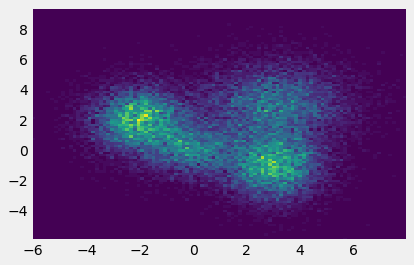

In [ ]:
# Fitness landscape with multiple peaks and lots of noise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 10000
N2 = int(10000/2)
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N2)
x2 = np.random.normal(peak2, 1.5, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
# x5 = np.random.uniform(-4, 4, 100000)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N2)
y2 = np.random.normal(peak2, 1.5, N)
y3 = np.random.normal(peak3[1], 1.2, N)
y4 = np.random.normal(peak4[1], 1.3, N)
# y5 = np.random.uniform(-4, 4, 100000)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()

## Catplot

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


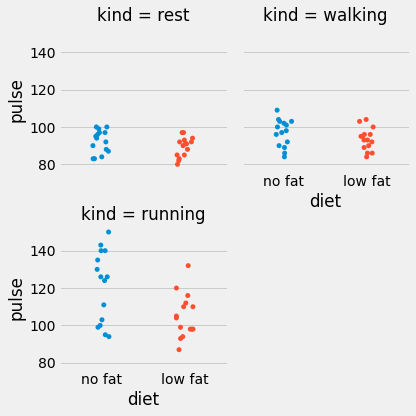

In [ ]:
import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')

df

graph = sns.catplot(
	x='diet', y='pulse', 
	col='kind', col_wrap=2, 
	height=3, data=df)
df

Text(0.5, 1.05, 'Title')

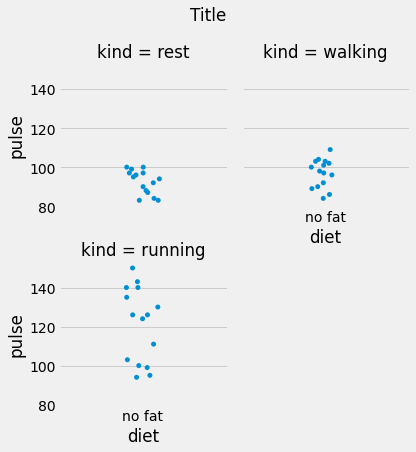

In [ ]:
# only plot selected fragments

import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')
df

graph = sns.catplot(x='diet', y='pulse', col='kind', col_wrap=2, height=3, data=df, order=['no fat'])
graph.fig.suptitle('Title', y=1.05)

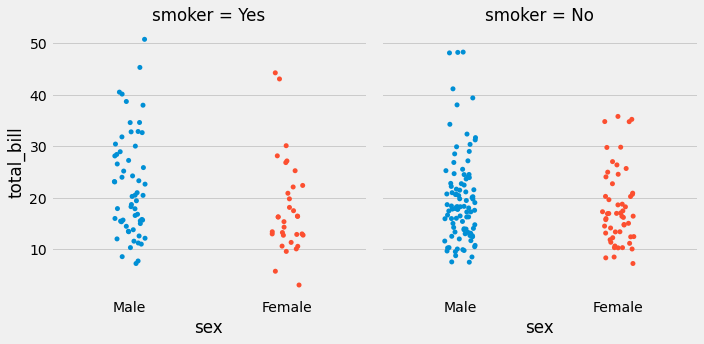

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='strip' ) # kind='strip' is default

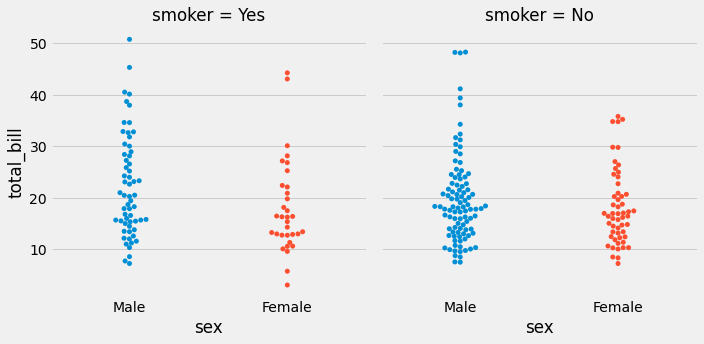

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(
	x='sex', y='total_bill', col='smoker', 
	data=df_test, kind='swarm' ) 

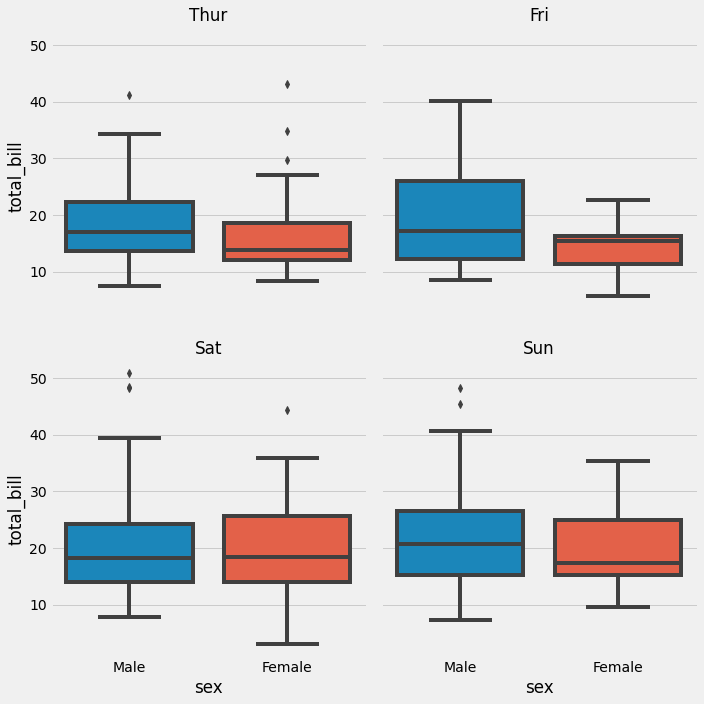

In [ ]:
g = sns.catplot(
	x='sex', y='total_bill', col='day', data=df_test, 
	kind='box', col_wrap=2
)

g.set_titles(template='{col_name}')

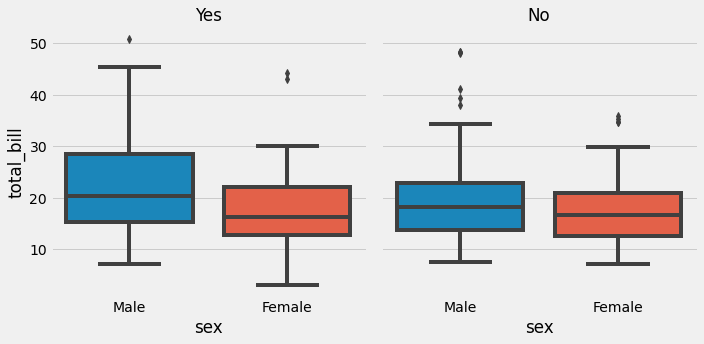

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, kind='box' ) # boxplot / box-and-whiskers plot


g.set_titles(template='{col_name}')

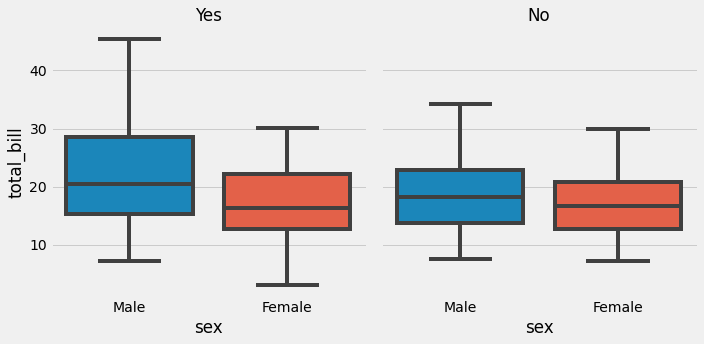

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, 
	kind='box',
	showfliers=False ) # boxplot / box-and-whiskers plot

g.set_titles(template='{col_name}')

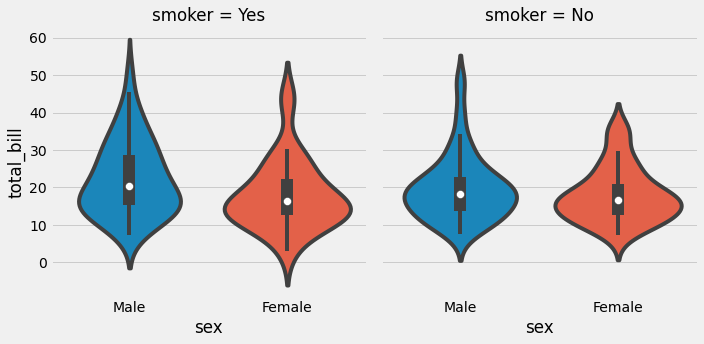

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='violin' ) 

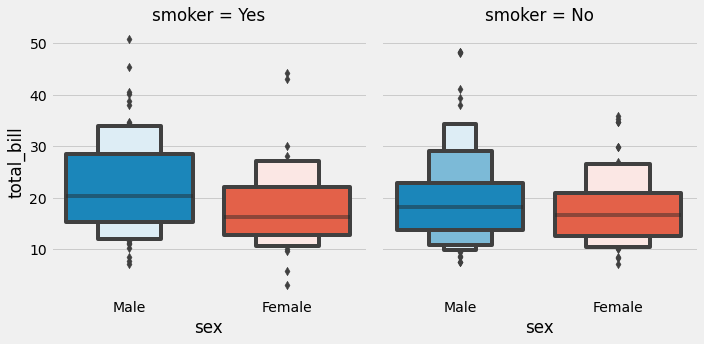

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='boxen' ) 

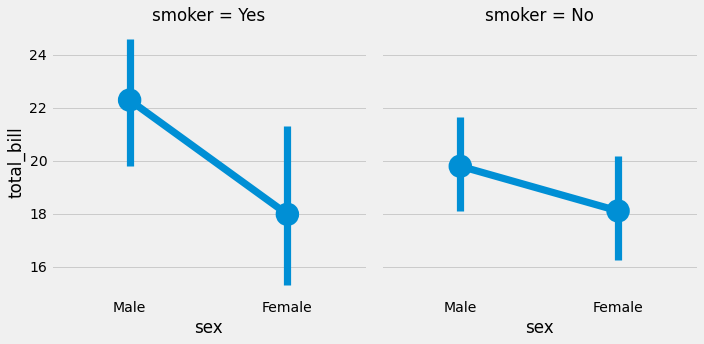

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='point' ) 

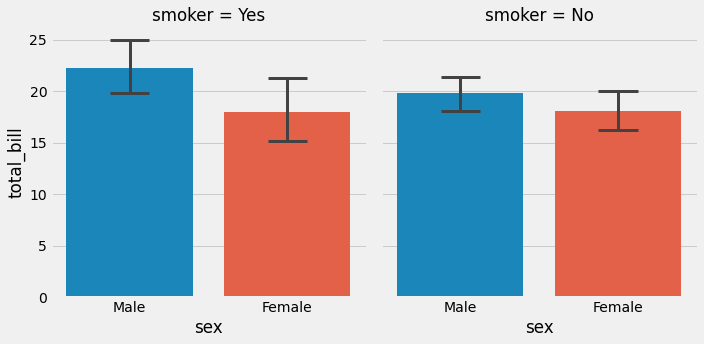

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='bar', errwidth=3, capsize=0.25) 

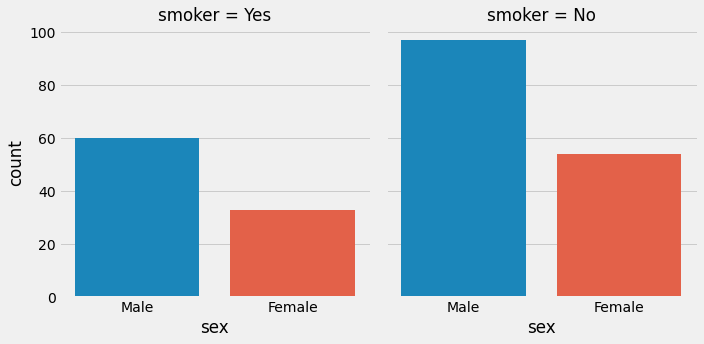

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', col='smoker', data=df_test, kind='count' ) 

## Multiple plots

C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\evgen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


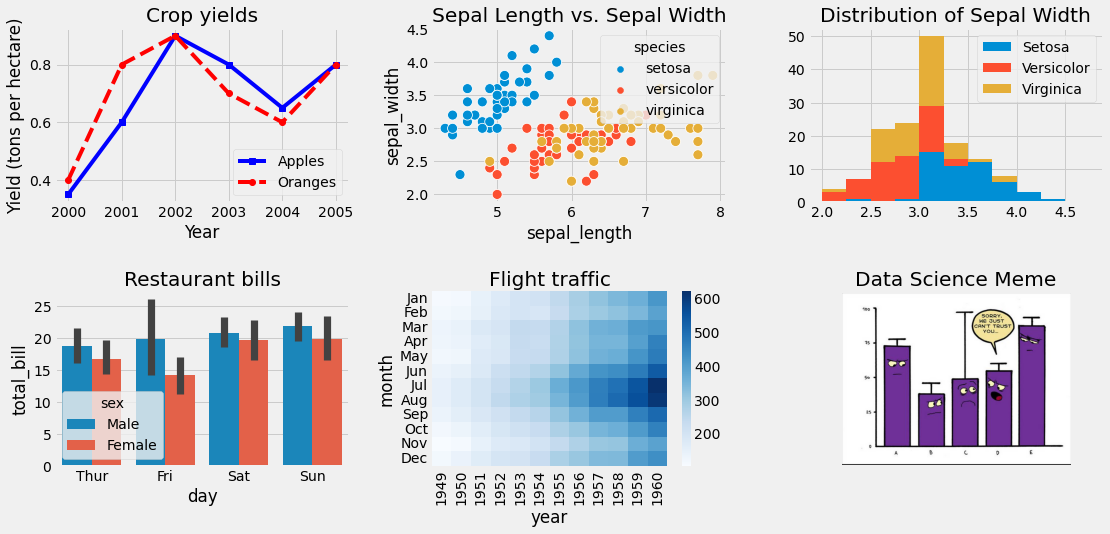

In [ ]:
# Plotting multiple charts in a grid

import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

flowers_df = sns.load_dataset('iris')
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
yield_oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908]
years = [2010, 2011, 2012, 2013, 2014, 2015]
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
tips_df = sns.load_dataset('tips')
img = Image.open('example_datasets/chart.jpg'); 

# plt.style.use('fivethirtyeight')

setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

flights_df = sns.load_dataset('flights')


# fig, axes = plt.subplots(2, 3, figsize=(16,8));
fig, axes = plt.subplots(
	2, 3, 
	figsize = (16,8), 
	# sharex=True
)


# Linegraph
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].set_title('Crop yields')
axes[0,0].legend(['Apples', 'Oranges'])

# Scatterplot
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(flowers_df.sepal_length, 
				flowers_df.sepal_width, 
				hue=flowers_df.species, 
				s=100, 
				ax = axes[0,1])

# Histogram
axes[0,2].set_title('Distribution of Sepal Width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
				bins = np.arange(2, 5, 0.25), 
				stacked=True); 
axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']); 

# Barplot
axes[1,0].set_title('Restaurant bills')
sns.barplot('day', 'total_bill', hue='sex', data=tips_df, ax=axes[1,0]);

# Heatmap
axes[1,1].set_title('Flight traffic')
sns.heatmap(
	flights_df.pivot('month', 'year', 'passengers'), ax=axes[1,1], cmap='Blues'
)

# Plot an image
axes[1,2].set_title('Data Science Meme')
axes[1,2].imshow(img)
axes[1,2].grid(False)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout(pad=2)



# For further references go here - cheatsheet:
# https://jovian.ai/aakashns/dataviz-cheatsheet


## 3D

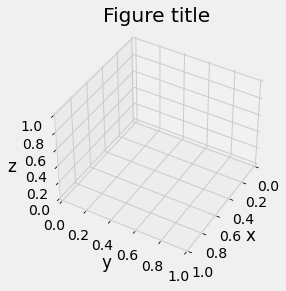

In [ ]:
# Empty grid
# If you run this in separate .py file, it will be interactive

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (3, 3)
# plt.rcParams['figure.dpi'] = 150


# Create 3D axes
# Way 1 - without specifying size
ax = plt.axes(projection='3d')
# Way 2 - specifying size
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

# Rotation
ax.view_init(azim=30, elev=40)

# label axes:
ax.set_title('Figure title')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# To make sure that comments before plot don't show
plt.show()

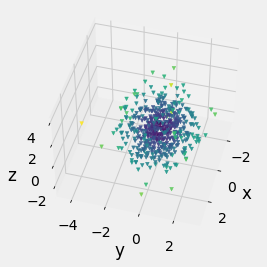

In [ ]:
# 3D scatterplot 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (6, 4)
# plt.rcParams['figure.dpi'] = 150

ax = plt.axes(projection='3d')

# Normal distribution: 
x = np.random.normal(size = 500)
y = np.random.normal(size = 500)
z = np.random.normal(size = 500)
# Can Use random data points: 
# x = np.random.randint(0, 100, (500,))
# y = np.random.randint(0, 100, (500,))
# z = np.random.randint(0, 100, (500,))


# Two ways to plot: 
ax.scatter(
	x, y, z, 
	# color items by their position from the center:
	c = np.linalg.norm([x, y, z], axis=0), 
	# change dots' size:
	s = 13, 
	marker = 'v', # Use marker figure
	alpha = 0.9 # Transparency
)
# ax.scatter3D(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the figure statically
ax.view_init(45, 15); # (elevation[deg], rotation_horison[deg])

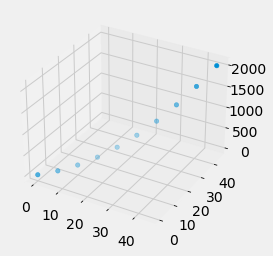

In [ ]:
# Pseudo-scatter plot = line plot without connecting each data point
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x_data = np.arange(0, 50, 5)
y_data = np.arange(0, 50, 5)
z_data = x_data * y_data

# Two options
ax.scatter(x_data, y_data, z_data)
# ax.plot(x_data, y_data, z_data)

plt.show()

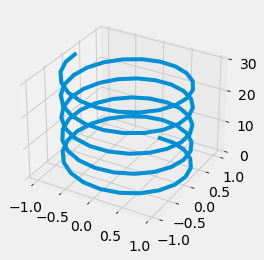

In [ ]:
# spring

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



ax = plt.axes(projection='3d')

z = np.linspace(0, 30, 100) # (start, stop, N)
x = np.sin(z)
y = np.cos(z)
# or create expandable figure:
# omega = 2
# x = np.cos(omega*z)
# y = np.sin(omega*z)

ax.plot3D(
	x, y, z, 
	lw=4, # line thickness
)

plt.show()

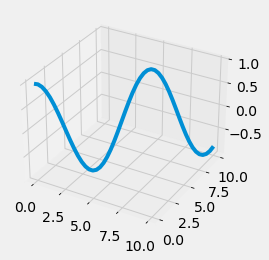

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
# alternative:
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

x = np.linspace(0, 10, 50)
z = np.cos(x)

# Two options: 
ax.plot(x, x, z)


plt.show()

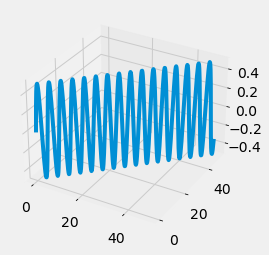

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

x = np.arange(0, 50, 0.1)
y = np.arange(0, 50, 0.1)
z = np.sin(x) * np.cos(y)

ax.plot(x, y, z)

plt.show()

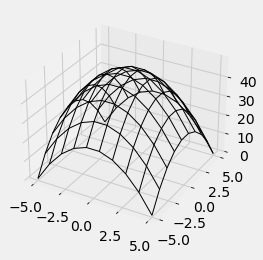

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3D wireframe

N = 10

ax = plt.axes(projection='3d'); 

def function_z(x, y):
	return 50 - (x**2 + y**2)

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
Z = function_z(X, Y)

ax.plot_wireframe(
	X, Y, Z, 
	color='black', 
	lw=1
)

(50, 50)


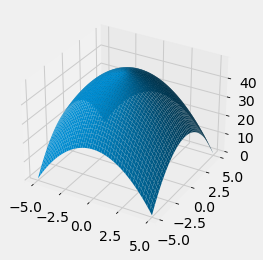

In [ ]:
# 3D surface plot

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

def function_z(x, y):
	return 50 - (x**2 + y**2)

N = 50

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
# print(X)
Z = function_z(X, Y)
print(Z.shape)

ax.plot_surface(X, Y, Z)

plt.show()

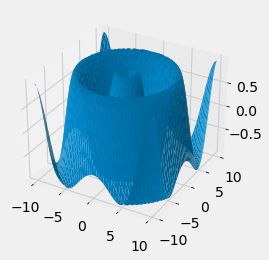

In [ ]:
# cone

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

def z_function(x, y):
	return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Convert vectors into matrices
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax.plot_surface(X, Y, Z)
plt.show()

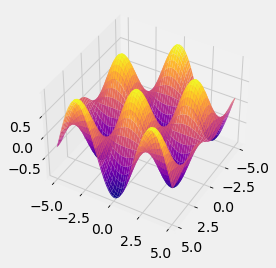

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x = np.arange(-5, 5, 0.1)
y = x

X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

ax.plot_surface(
	X, Y, Z, 
	cmap = 'plasma', # Add colour map
)
# Rotation
ax.view_init(azim=30, elev=40)

plt.show()

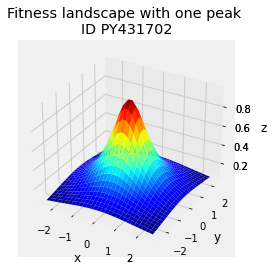

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

ID = 'PY431702'

def f(x, y):
    return 1/ (1 + x*x + y*y)

x = np.linspace(-2.5, 2.5, 30)
y = np.linspace(-2.5, 2.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')


ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title(f'Fitness landscape with one peak \nID {ID}');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');

# To remove all axes
# ax.set_axis_off()

# plt.savefig('figure name.jpg', format='jpg', dpi=1200)


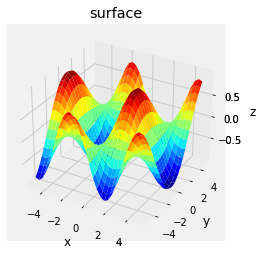

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x, y):
    # return np.sin(np.sqrt(x ** 2 + y ** 2))
    # return 1/ (1 + x*x + y*y)
	# return (np.sin(5*x) * np.cos(5*y))/5
    return (np.sin(x) * np.cos(y/1.9))
    
    # return 2.71828**(-0.9*(x**2 + 0.5*(x-y)**2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                # cmap='viridis', edgecolor='none')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title('surface');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');


C:\Users\evgen\AppData\Local\Temp\ipykernel_12020\104325889.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


Text(0.5, 0, 'Height (m)')

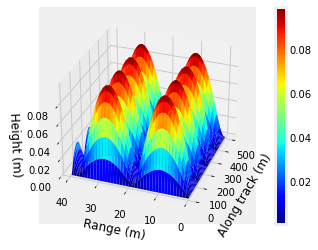

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
# Create figure. 
fig = plt.figure() 
ax = fig.gca(projection = '3d') 
# Generate example data. 
R, Y = np.meshgrid(np.arange(0, 500, 0.5), np.arange(0, 40, 0.5)) 
z = 0.1 * np.abs(np.sin(R/40) * np.sin(Y/6)) 
# Plot the data. 
surf = ax.plot_surface(R, Y, z, cmap='jet', linewidth=0) 
fig.colorbar(surf) 
# Set viewpoint. 
ax.azim = -160 
ax.elev = 30 
# Label axes. 
ax.set_xlabel('Along track (m)') 
ax.set_ylabel('Range (m)') 
ax.set_zlabel('Height (m)') 


